Group Project - Group # 20
Group Member: <br>
1.Zeeshan Ahmad  <br>
2.Fabio Fahme <br>
PLEASE ADD YOUR NAME HERE

In this project a dataset from year 2019 was used, which calculated the happiness ranking globally for different countries based on multiple factors such as GDP per capita, Social Support, healthy life expectancy , Freedom to make life choices, Generosity and Pereceptions of corruption

 **If you see this line of text please edit it so we know the notebook is properly shared!**

# <h1><center>Import libraries and load data set<h1><center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import plotly
import urllib.request, json 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# preparing to import data from GitHub repository
urls = ['https://raw.githubusercontent.com/fabverto/Data-Science-2-Group-20-Project/main/2019.csv',
       'https://raw.githubusercontent.com/fabverto/Data-Science-2-Group-20-Project/main/2018.csv',
       'https://raw.githubusercontent.com/fabverto/Data-Science-2-Group-20-Project/main/2017.csv',
       'https://raw.githubusercontent.com/fabverto/Data-Science-2-Group-20-Project/main/2016.csv',
       'https://raw.githubusercontent.com/fabverto/Data-Science-2-Group-20-Project/main/2015.csv']

In [4]:
# loading all datasets from year 2015 to 2019
Ranking19 = pd.read_csv(urls[0], header = 0, sep = ',')
Ranking18 = pd.read_csv(urls[1], header = 0, sep = ',')
Ranking17 = pd.read_csv(urls[2], header = 0, sep = ',')
Ranking16 = pd.read_csv(urls[3], header = 0, sep = ',')
Ranking15 = pd.read_csv(urls[4], header = 0, sep = ',')

# Categorical assigning functions

In [ ]:
# function to assign regions to each country 
def assignRegion(country):
  if(country in set(Ranking16.Country)):
    return Ranking16.Region.loc[Ranking16['Country'] == country].values[0]
  else:
    return 'Undefined'

In [51]:
# function to assign generosity categorical rankings
def assignGenerosity(generosity):
  if(generosity <= 0.15):
    return 'Low'
  elif(generosity > 0.15) & (generosity < 0.3):
    return 'Mid'
  elif(generosity >= 0.3):
    return 'High'
  else:
    return 'none'

In [52]:
# function to assign gdp categorical ranking
def assignGDP(gdp):
  if(gdp <= 0.7):
    return 'Low'
  elif((gdp > 0.7) & (gdp < 1.15)):
    return 'Mid'
  elif(gdp >= 1.15):
    return 'High'
  else:
    return 'none'

In [53]:
# function to assign corruption categorical ranking
def assignCorruption(corruption):
  if(corruption >= 0.25):
    return 'Low'
  elif((corruption > 0.1) & (corruption < 0.25)):
    return 'Mid'
  elif(corruption <= 0.1):
    return 'High'
  else:
    return 'none'

In [54]:
# function to assign Life expectancy categorical ranking
def assignLifeExpectancy(expectancy):
  if(expectancy <= 0.5):
    return 'Low'
  elif((expectancy > 0.5) & (expectancy < 0.8)):
    return 'Mid'
  elif(expectancy >= 0.8):
    return 'High'
  else:
    return 'none'

In [55]:
# function to assign support categorical ranking
def assignSocialSupport(support):
  if(support <= 0.9):
    return 'Low'
  elif((support > 0.9) & (support < 1.3)):
    return 'Mid'
  elif(support >= 1.3):
    return 'High'
  else:
    return 'none'

In [56]:
# function to assign Freedom categorical ranking
def assignFreedom(freedom):
  if(freedom <= 0.25):
    return 'Low'
  elif((freedom > 0.25) & (freedom < 0.45)):
    return 'Mid'
  elif(freedom >= 0.45):
    return 'High'
  else:
    return 'none'

In [57]:
# function to assign happiness categorical ranking
def assignHappiness(happiness):
  if(happiness <= 4.5):
    return 'Low'
  elif((happiness > 4.5) & (happiness < 6)):
    return 'Mid'
  elif(happiness >= 6):
    return 'High'
  else:
    return 'none'

# Overall Rankings

## Happiness

In [44]:
Ranking19.sort_values(by=['Score'])

Overall rank  ... Perceptions of corruption
155           156  ...                     0.091
154           155  ...                     0.035
153           154  ...                     0.025
152           153  ...                     0.147
151           152  ...                     0.411
..            ...  ...                       ...
4               5  ...                     0.298
3               4  ...                     0.118
2               3  ...                     0.341
1               2  ...                     0.410
0               1  ...                     0.393

[156 rows x 9 columns]

In [7]:
Ranking18.sort_values(by=['Score'])

Overall rank  ... Perceptions of corruption
155           156  ...                     0.076
154           155  ...                     0.038
153           154  ...                     0.106
152           153  ...                     0.097
151           152  ...                     0.064
..            ...  ...                       ...
4               5  ...                     0.357
3               4  ...                     0.138
2               3  ...                     0.408
1               2  ...                     0.340
0               1  ...                     0.393

[156 rows x 9 columns]

In [11]:
Ranking17.sort_values(by=['Happiness.Score'])

Country  ...  Dystopia.Residual
154  Central African Republic  ...           2.066005
153                   Burundi  ...           1.683024
152                  Tanzania  ...           0.621130
151                     Syria  ...           1.061574
150                    Rwanda  ...           0.540061
..                        ...  ...                ...
4                     Finland  ...           2.430182
3                 Switzerland  ...           2.276716
2                     Iceland  ...           2.322715
1                     Denmark  ...           2.313707
0                      Norway  ...           2.277027

[155 rows x 12 columns]

In [12]:
Ranking16.sort_values(by=['Happiness Score'])

Country  ... Dystopia Residual
156      Burundi  ...           2.10404
155        Syria  ...           0.81789
154         Togo  ...           2.13540
153  Afghanistan  ...           2.14558
152        Benin  ...           2.10812
..           ...  ...               ...
4        Finland  ...           2.82596
3         Norway  ...           2.66465
2        Iceland  ...           2.83137
1    Switzerland  ...           2.69463
0        Denmark  ...           2.73939

[157 rows x 13 columns]

In [13]:
Ranking15.sort_values(by=['Happiness Score'])

Country  ... Dystopia Residual
157         Togo  ...           1.56726
156      Burundi  ...           1.83302
155        Syria  ...           0.32858
154        Benin  ...           1.63328
153       Rwanda  ...           0.67042
..           ...  ...               ...
4         Canada  ...           2.45176
3         Norway  ...           2.46531
2        Denmark  ...           2.49204
1        Iceland  ...           2.70201
0    Switzerland  ...           2.51738

[158 rows x 12 columns]

## GDP

In [20]:
Ranking19.sort_values(by=['GDP per capita'])

Overall rank  ... Perceptions of corruption
111           112  ...                     0.270
154           155  ...                     0.035
144           145  ...                     0.180
140           141  ...                     0.033
126           127  ...                     0.053
..            ...  ...                       ...
50             51  ...                     0.097
20             21  ...                     0.182
33             34  ...                     0.453
13             14  ...                     0.316
28             29  ...                     0.167

[156 rows x 9 columns]

In [22]:
Ranking18.sort_values(by=['GDP per capita'])

Overall rank  ... Perceptions of corruption
97             98  ...                     0.282
154           155  ...                     0.038
131           132  ...                     0.052
148           149  ...                     0.030
155           156  ...                     0.076
..            ...  ...                       ...
44             45  ...                     0.106
33             34  ...                     0.457
16             17  ...                     0.321
31             32  ...                     0.171
19             20  ...                       NaN

[156 rows x 9 columns]

In [19]:
Ranking17.sort_values(by=['Economy..GDP.per.Capita.'])

Country  ...  Dystopia.Residual
154  Central African Republic  ...           2.066005
92                    Somalia  ...           3.117485
153                   Burundi  ...           1.683024
125          Congo (Kinshasa)  ...           2.224959
147                   Liberia  ...           1.673286
..                        ...  ...                ...
20       United Arab Emirates  ...           1.734704
38                     Kuwait  ...           1.640425
25                  Singapore  ...           1.216362
17                 Luxembourg  ...           1.619512
34                      Qatar  ...           1.145464

[155 rows x 12 columns]

In [18]:
Ranking16.sort_values(by=['Economy (GDP per Capita)'])

Country  ... Dystopia Residual
75            Somalia  ...           3.83772
124  Congo (Kinshasa)  ...           2.74924
156           Burundi  ...           2.10404
131            Malawi  ...           2.82859
149           Liberia  ...           2.23284
..                ...  ...               ...
3              Norway  ...           2.66465
40             Kuwait  ...           2.28085
21          Singapore  ...           1.99375
19         Luxembourg  ...           2.11055
35              Qatar  ...           1.58224

[157 rows x 13 columns]

In [17]:
Ranking15.sort_values(by=['Economy (GDP per Capita)'])

Country  ... Dystopia Residual
119  Congo (Kinshasa)  ...           2.86712
156           Burundi  ...           1.83302
130            Malawi  ...           2.80791
143             Niger  ...           1.87877
115           Liberia  ...           2.77729
..                ...  ...               ...
3              Norway  ...           2.46531
23          Singapore  ...           1.88501
38             Kuwait  ...           1.87634
16         Luxembourg  ...           1.96961
27              Qatar  ...           1.55674

[158 rows x 12 columns]

## Corruption

In [27]:
Ranking19.sort_values(by=['Perceptions of corruption'])

Overall rank  ... Perceptions of corruption
70             71  ...                     0.000
96             97  ...                     0.004
47             48  ...                     0.005
45             46  ...                     0.006
77             78  ...                     0.006
..            ...  ...                       ...
7               8  ...                     0.380
0               1  ...                     0.393
1               2  ...                     0.410
151           152  ...                     0.411
33             34  ...                     0.453

[156 rows x 9 columns]

In [28]:
Ranking18.sort_values(by=['Perceptions of corruption'])

Overall rank  ... Perceptions of corruption
92             93  ...                     0.000
66             67  ...                     0.000
51             52  ...                     0.001
49             50  ...                     0.006
99            100  ...                     0.009
..            ...  ...                       ...
0               1  ...                     0.393
2               3  ...                     0.408
150           151  ...                     0.444
33             34  ...                     0.457
19             20  ...                       NaN

[156 rows x 9 columns]

In [26]:
Ranking17.sort_values(by=['Trust..Government.Corruption.'])

Country  ...  Dystopia.Residual
89   Bosnia and Herzegovina  ...           1.892173
56                  Romania  ...           2.176831
37      Trinidad and Tobago  ...           2.053247
55                  Moldova  ...           2.807808
104                Bulgaria  ...           0.996139
..                      ...  ...                ...
8                    Sweden  ...           2.097538
1                   Denmark  ...           2.313707
34                    Qatar  ...           1.145464
150                  Rwanda  ...           0.540061
25                Singapore  ...           1.216362

[155 rows x 12 columns]

In [24]:
Ranking16.sort_values(by=['Trust (Government Corruption)'])

Country  ... Dystopia Residual
86   Bosnia and Herzegovina  ...           2.48406
78                Indonesia  ...           2.03171
128                Bulgaria  ...           1.15377
70                  Romania  ...           2.45184
42      Trinidad and Tobago  ...           2.51394
..                      ...  ...               ...
7               New Zealand  ...           2.47553
0                   Denmark  ...           2.73939
21                Singapore  ...           1.99375
35                    Qatar  ...           1.58224
151                  Rwanda  ...           0.96819

[157 rows x 13 columns]

In [23]:
Ranking15.sort_values(by=['Trust (Government Corruption)'])

Country  ... Dystopia Residual
73                Indonesia  ...           1.86399
95   Bosnia and Herzegovina  ...           2.06367
85                  Romania  ...           1.93129
133                Bulgaria  ...           0.89991
55                Lithuania  ...           2.44649
..                      ...  ...               ...
7                    Sweden  ...           2.37119
2                   Denmark  ...           2.49204
23                Singapore  ...           1.88501
27                    Qatar  ...           1.55674
153                  Rwanda  ...           0.67042

[158 rows x 12 columns]

## Life Expectancy

In [41]:
Ranking19.sort_values(by=['Healthy life expectancy'])

Overall rank  ... Perceptions of corruption
134           135  ...                     0.135
154           155  ...                     0.035
143           144  ...                     0.093
131           132  ...                     0.078
98             99  ...                     0.090
..            ...  ...                       ...
5               6  ...                     0.343
29             30  ...                     0.079
57             58  ...                     0.140
75             76  ...                     0.287
33             34  ...                     0.453

[156 rows x 9 columns]

In [40]:
Ranking18.sort_values(by=['Healthy life expectancy'])

Overall rank  ... Perceptions of corruption
112           113  ...                     0.053
154           155  ...                     0.038
90             91  ...                     0.032
130           131  ...                     0.060
140           141  ...                     0.112
..            ...  ...                       ...
56             57  ...                     0.051
35             36  ...                     0.074
53             54  ...                     0.150
33             34  ...                     0.457
75             76  ...                     0.291

[156 rows x 9 columns]

In [39]:
Ranking17.sort_values(by=['Health..Life.Expectancy.'])

Country  ...  Dystopia.Residual
138                   Lesotho  ...           1.429835
105              Sierra Leone  ...           2.668460
154  Central African Republic  ...           2.066005
136                      Chad  ...           2.071238
127               Ivory Coast  ...           1.844964
..                        ...  ...                ...
33                      Spain  ...           1.927758
54                South Korea  ...           1.880378
50                      Japan  ...           1.363224
70    Hong Kong S.A.R., China  ...           0.554633
25                  Singapore  ...           1.216362

[155 rows x 12 columns]

In [42]:
Ranking16.sort_values(by=['Health (Life Expectancy)'])

Country              Region  ...  Generosity  Dystopia Residual
110  Sierra Leone  Sub-Saharan Africa  ...     0.23897            3.01402
143          Chad  Sub-Saharan Africa  ...     0.18667            2.30637
138   Ivory Coast  Sub-Saharan Africa  ...     0.20338            1.97478
140        Angola  Sub-Saharan Africa  ...     0.12071            2.09459
102       Nigeria  Sub-Saharan Africa  ...     0.23219            2.88586
..            ...                 ...  ...         ...                ...
36          Spain      Western Europe  ...     0.17665            2.39663
57    South Korea        Eastern Asia  ...     0.18824            2.35015
52          Japan        Eastern Asia  ...     0.10224            1.80584
21      Singapore   Southeastern Asia  ...     0.32706            1.99375
74      Hong Kong        Eastern Asia  ...     0.40097            0.92614

[157 rows x 13 columns]

In [37]:
Ranking15.sort_values(by=['Health (Life Expectancy)'])

Country  ... Dystopia Residual
122              Sierra Leone  ...           2.51009
127                  Botswana  ...           1.46181
147  Central African Republic  ...           2.72230
100                 Swaziland  ...           2.48676
96                    Lesotho  ...           2.79832
..                        ...  ...               ...
35                      Spain  ...           2.12367
46                South Korea  ...           2.21978
45                      Japan  ...           1.68435
71                  Hong Kong  ...           0.65429
23                  Singapore  ...           1.88501

[158 rows x 12 columns]

## Freedom

In [34]:
Ranking19.sort_values(by=['Freedom to make life choices'])

Overall rank     Country or region  ...  Generosity  Perceptions of corruption
153           154           Afghanistan  ...       0.158                      0.025
155           156           South Sudan  ...       0.202                      0.091
148           149                 Syria  ...       0.331                      0.141
146           147                 Haiti  ...       0.419                      0.110
121           122            Mauritania  ...       0.106                      0.088
..            ...                   ...  ...         ...                        ...
0               1               Finland  ...       0.153                      0.393
20             21  United Arab Emirates  ...       0.262                      0.182
2               3                Norway  ...       0.271                      0.341
108           109              Cambodia  ...       0.232                      0.062
40             41            Uzbekistan  ...       0.322                      0.240

[156 rows x 9 columns]

In [35]:
Ranking18.sort_values(by=['Freedom to make life choices'])

Overall rank Country or region  ...  Generosity  Perceptions of corruption
141           142            Angola  ...       0.079                      0.061
136           137             Sudan  ...       0.134                      0.082
147           148             Haiti  ...       0.392                      0.104
155           156           Burundi  ...       0.149                      0.076
83             84           Algeria  ...       0.055                      0.135
..            ...               ...  ...         ...                        ...
0               1           Finland  ...       0.202                      0.393
2               3           Denmark  ...       0.284                      0.408
1               2            Norway  ...       0.286                      0.340
119           120          Cambodia  ...       0.256                      0.065
43             44        Uzbekistan  ...       0.328                      0.259

[156 rows x 9 columns]

In [33]:
Ranking17.sort_values(by=['Freedom'])

Country  ...  Dystopia.Residual
139      Angola  ...           1.614482
129       Sudan  ...           1.687066
144       Haiti  ...           1.697168
153     Burundi  ...           1.683024
151       Syria  ...           1.061574
..          ...  ...                ...
1       Denmark  ...           2.313707
2       Iceland  ...           2.322715
128    Cambodia  ...           1.042941
0        Norway  ...           2.277027
46   Uzbekistan  ...           1.816914

[155 rows x 12 columns]

In [32]:
Ranking16.sort_values(by=['Freedom'])

Country  ... Dystopia Residual
132        Sudan  ...           2.10995
140       Angola  ...           2.09459
156      Burundi  ...           2.10404
98        Greece  ...           2.12944
155        Syria  ...           0.81789
..           ...  ...               ...
9         Sweden  ...           2.54734
1    Switzerland  ...           2.69463
139     Cambodia  ...           1.31573
3         Norway  ...           2.66465
48    Uzbekistan  ...           2.34638

[157 rows x 13 columns]

In [31]:
Ranking15.sort_values(by=['Freedom'])

Country  ... Dystopia Residual
111                    Iraq  ...           1.95335
101                  Greece  ...           1.80101
95   Bosnia and Herzegovina  ...           2.06367
117                   Sudan  ...           2.20857
136                  Angola  ...           1.94939
..                      ...  ...               ...
43               Uzbekistan  ...           2.23741
7                    Sweden  ...           2.37119
144                Cambodia  ...           0.98195
0               Switzerland  ...           2.51738
3                    Norway  ...           2.46531

[158 rows x 12 columns]

# <h1><center> 2019 Data Analysis<center><h1>

In [22]:
Ranking19.head()

Overall rank Country or region  ...  Generosity  Perceptions of corruption
0             1           Finland  ...       0.153                      0.393
1             2           Denmark  ...       0.252                      0.410
2             3            Norway  ...       0.271                      0.341
3             4           Iceland  ...       0.354                      0.118
4             5       Netherlands  ...       0.322                      0.298

[5 rows x 9 columns]

In [23]:
Ranking19.shape

(156, 9)

So data set contains 9 columns and 156 rows. Thus, it's ranking of 156 countries globally in terms of happiness

In [24]:
Ranking19.isnull().values.any()

False

In [25]:
Ranking19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


It appears that dataset is clean and no need for changes as there are no null or missing values. Data type for ranking is integer and rest is float which is good to perform analysis 

In [26]:
Ranking19.describe()

Overall rank       Score  ...  Generosity  Perceptions of corruption
count    156.000000  156.000000  ...  156.000000                 156.000000
mean      78.500000    5.407096  ...    0.184846                   0.110603
std       45.177428    1.113120  ...    0.095254                   0.094538
min        1.000000    2.853000  ...    0.000000                   0.000000
25%       39.750000    4.544500  ...    0.108750                   0.047000
50%       78.500000    5.379500  ...    0.177500                   0.085500
75%      117.250000    6.184500  ...    0.248250                   0.141250
max      156.000000    7.769000  ...    0.566000                   0.453000

[8 rows x 8 columns]

In [27]:
Ranking19['Country or region'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

From above list it can be concluded that data cleaning is not required because there doesn't appear to be a misspelling or repeat of the same country with different spelling. Example United States can be written as USA or United States of America. But, data is clean and there aren't multiple entries for United States or any other countries

In [28]:
Ranking19.corr()

Overall rank  ...  Perceptions of corruption
Overall rank                      1.000000  ...                  -0.351959
Score                            -0.989096  ...                   0.385613
GDP per capita                   -0.801947  ...                   0.298920
Social support                   -0.767465  ...                   0.181899
Healthy life expectancy          -0.787411  ...                   0.295283
Freedom to make life choices     -0.546606  ...                   0.438843
Generosity                       -0.047993  ...                   0.326538
Perceptions of corruption        -0.351959  ...                   1.000000

[8 rows x 8 columns]

As per the description above overall rank seems to be negatively correlated to columns. Which can be explained, for example if the rank increased (in numerical order only)  score will decrease. Hence, the country ranked 50th will have less score compared to country thats ranked 1st

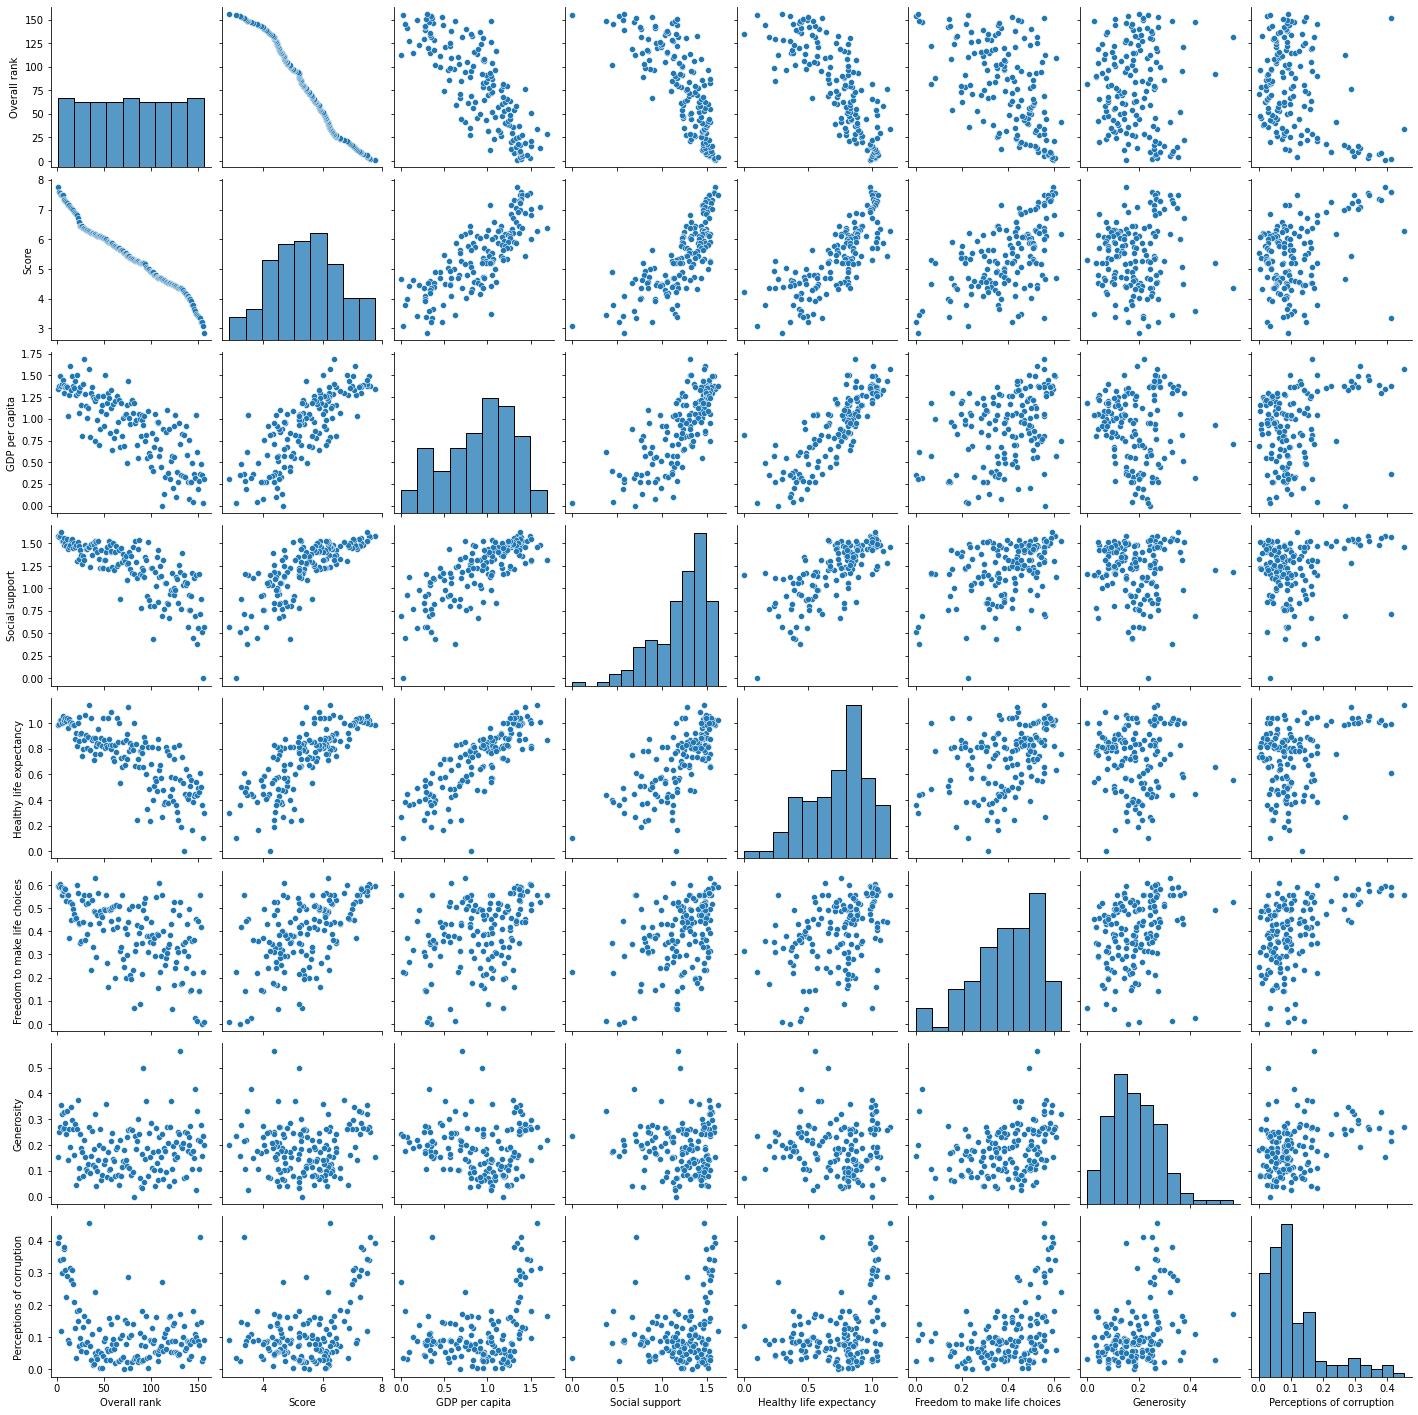

In [29]:
sns.pairplot(Ranking19);

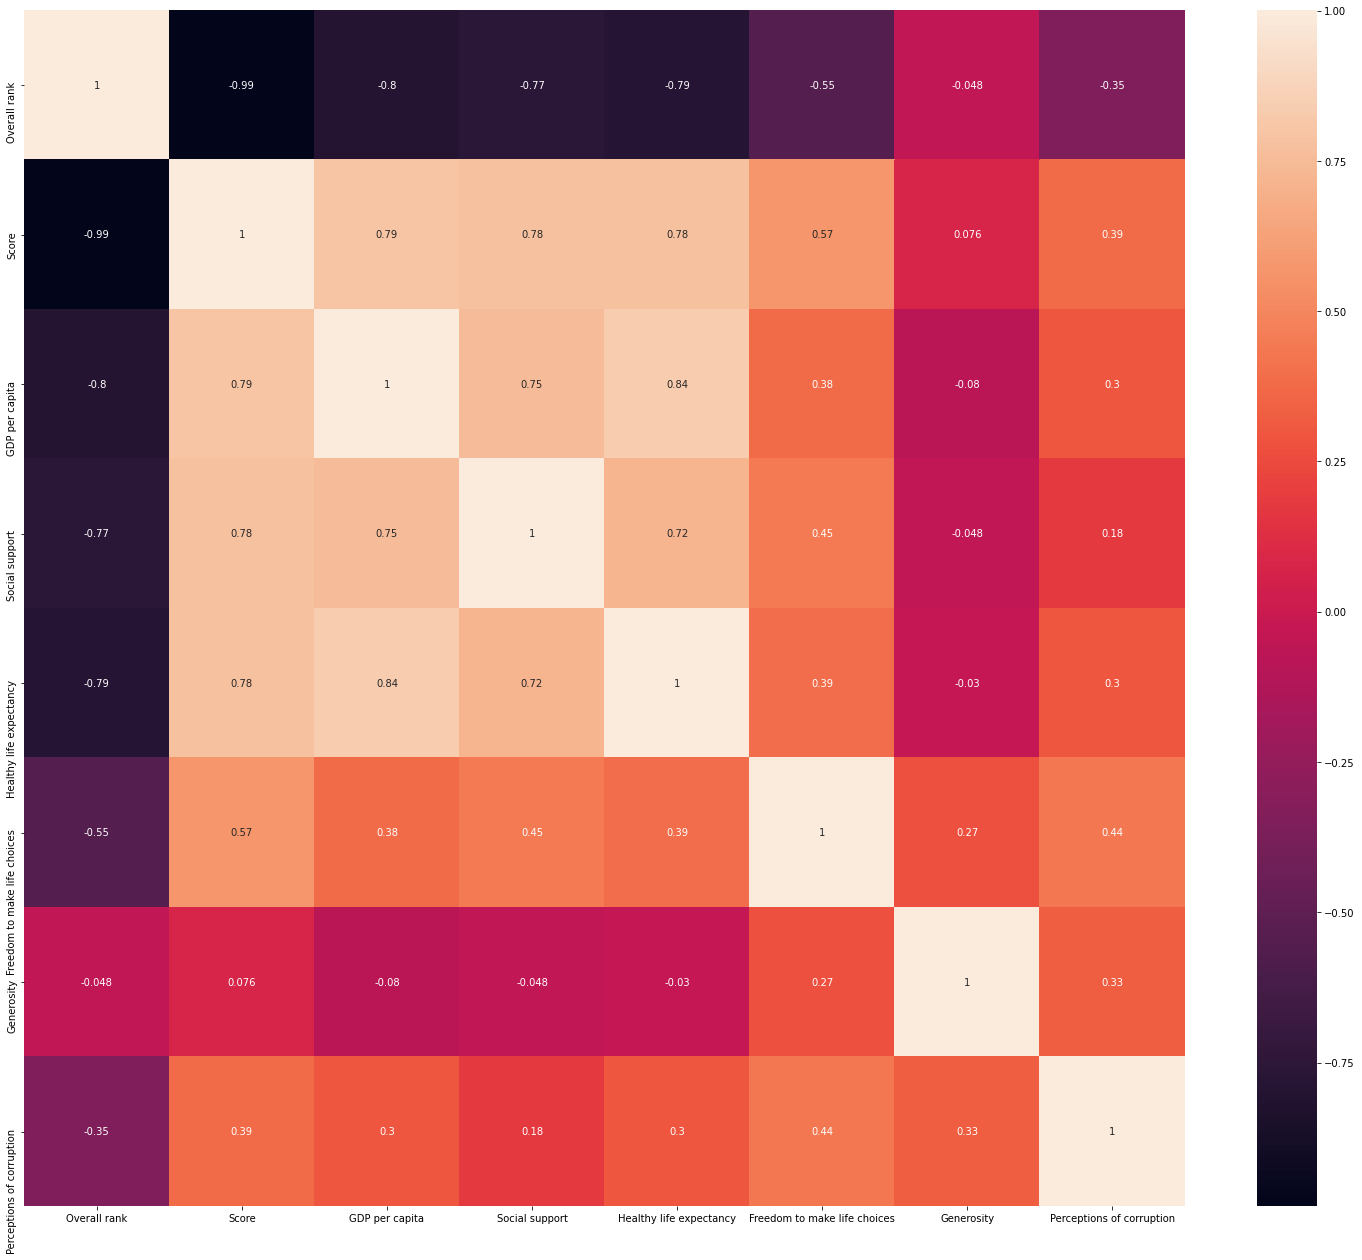

In [ ]:
correlations=Ranking19.corr()
indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(Ranking19[indx].corr(),annot=True);

From heat map above, it can be concluded that Overall rank is heavily negatively (-0.99) correlated to score, which make sense if the country is ranked 156 it will have the least score compared to country which is ranked 1st will have the highest score.

For data analysis we will compare score of different countries because score have positive correaltion with other factors.

In [30]:
Ranking19.tail()

Overall rank  ... Perceptions of corruption
151           152  ...                     0.411
152           153  ...                     0.147
153           154  ...                     0.025
154           155  ...                     0.035
155           156  ...                     0.091

[5 rows x 9 columns]

So the country that's ranked last is South Sudan with overall rank of 156 and score of 2.853

In [31]:
Ranking19.rename(columns={'Overall rank':'Rank', 
                        'GDP per capita':'GDP',
                        'Social support':'Social',
                       'Healthy life expectancy':'Health',
                       'Freedom to make life choices':'Freedom',
                       'Perceptions of corruption':'CorruptionImage'}, 
                 inplace=True)

In [ ]:
Ranking19.tail()

Rank         Country or region  ...  Generosity  CorruptionImage
151   152                    Rwanda  ...       0.217            0.411
152   153                  Tanzania  ...       0.276            0.147
153   154               Afghanistan  ...       0.158            0.025
154   155  Central African Republic  ...       0.235            0.035
155   156               South Sudan  ...       0.202            0.091

[5 rows x 9 columns]

In [32]:
result=ols("Score ~ GDP + Social + Health + Freedom + Generosity + CorruptionImage",data=Ranking19).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.40e-46
Time:                        17:43:10   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7952      0.211     

Generosity and CorruptionImage (Perceptions of corruption) have failed the P(t) as it's greater than 0.05 and failed to reject null hypothesis. Thus, it's better to drop these values to improve the model

In [33]:
result1=ols("Score ~ GDP + Social + Health + Freedom ",data=Ranking19).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.82e-47
Time:                        17:43:14   Log-Likelihood:                -122.62
No. Observations:                 156   AIC:                             255.2
Df Residuals:                     151   BIC:                             270.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8921      0.199      9.491      0.0

Based on the OLS it can be concluded that it's normally distributed because Kurtosis value is close to 3. Durbin-Watson value is 1.641 which is betweeb 0 and 2, hence it can be concluded that data is positively correlated which makes sense that score will increase as GDP per capita, Social support,Healthy life expectancy and freedom to make life choices increases.

Model seems to be good because R-squared and adjusted R-squared are close to each other and not far from 1. Plus, Prob of F statistic is so less almost 0 which makes model goos and have intercept value of 1.8921

OLS model is based on score being the dependent variable. In my hypothesis I have assumed that Higher the score better is the happiness rank of a country (1) and lower the score, least happy is the country (156). Thus, purely in numerical form there is an inverse relation between Overall rank and Score

In [34]:
resultignore=ols("Rank ~ Score + GDP + Social + Health + Freedom + Generosity + CorruptionImage",data=Ranking19).fit()
print(resultignore.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1080.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          1.31e-123
Time:                        17:43:16   Log-Likelihood:                -506.98
No. Observations:                 156   AIC:                             1030.
Df Residuals:                     148   BIC:                             1054.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         291.5754      3.089     

In [64]:
# creating a copy of thr 2019 dataset as it will be modified
copy19 = Ranking19.copy()
copy19.rename(columns={'Score':'Happiness','Country or region':'Country', 'CorruptionImage':'Corruption','Health':'Life Expectancy'}, inplace=True)
copy19

Rank                   Country  Happiness  ...  Freedom  Generosity  Corruption
0       1                   Finland      7.769  ...    0.596       0.153       0.393
1       2                   Denmark      7.600  ...    0.592       0.252       0.410
2       3                    Norway      7.554  ...    0.603       0.271       0.341
3       4                   Iceland      7.494  ...    0.591       0.354       0.118
4       5               Netherlands      7.488  ...    0.557       0.322       0.298
..    ...                       ...        ...  ...      ...         ...         ...
151   152                    Rwanda      3.334  ...    0.555       0.217       0.411
152   153                  Tanzania      3.231  ...    0.417       0.276       0.147
153   154               Afghanistan      3.203  ...    0.000       0.158       0.025
154   155  Central African Republic      3.083  ...    0.225       0.235       0.035
155   156               South Sudan      2.853  ...    0.010       0.202       0.091

[156 rows x 9 columns]

In [65]:
copy19['Region'] = copy19.apply(lambda row: assignRegion(row['Country']), axis=1)
copy19

Rank                   Country  ...  Corruption              Region
0       1                   Finland  ...       0.393      Western Europe
1       2                   Denmark  ...       0.410      Western Europe
2       3                    Norway  ...       0.341      Western Europe
3       4                   Iceland  ...       0.118      Western Europe
4       5               Netherlands  ...       0.298      Western Europe
..    ...                       ...  ...         ...                 ...
151   152                    Rwanda  ...       0.411  Sub-Saharan Africa
152   153                  Tanzania  ...       0.147  Sub-Saharan Africa
153   154               Afghanistan  ...       0.025       Southern Asia
154   155  Central African Republic  ...       0.035           Undefined
155   156               South Sudan  ...       0.091  Sub-Saharan Africa

[156 rows x 10 columns]

In [46]:
copy19.Region.unique()

array(['Western Europe', 'Australia and New Zealand', 'North America',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'Southeastern Asia',
       'Undefined', 'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [66]:
copy19[copy19.Region == 'Undefined']

Rank                   Country  ...  Corruption     Region
38     39         Trinidad & Tobago  ...       0.016  Undefined
63     64           Northern Cyprus  ...       0.162  Undefined
83     84           North Macedonia  ...       0.034  Undefined
119   120                    Gambia  ...       0.167  Undefined
122   123                Mozambique  ...       0.138  Undefined
134   135                 Swaziland  ...       0.135  Undefined
143   144                   Lesotho  ...       0.093  Undefined
154   155  Central African Republic  ...       0.035  Undefined

[8 rows x 10 columns]

In [67]:
# fillin the undefined regions left
copy19.Region.loc[copy19['Country'] == 'Trinidad & Tobago'] = 'Latin America and Caribbean'
copy19.Region.loc[copy19['Country'] == 'Northern Cyprus'] = 'Middle East and Northern Africa'
copy19.Region.loc[copy19['Country'] == 'North Macedonia'] = 'Central and Eastern Europe'
copy19.Region.loc[copy19['Country'] == 'Gambia'] = 'Sub-Saharan Africa'
copy19.Region.loc[copy19['Country'] == 'Mozambique'] = 'Sub-Saharan Africa' 
copy19.Region.loc[copy19['Country'] == 'Swaziland'] = 'Sub-Saharan Africa'
copy19.Region.loc[copy19['Country'] == 'Lesotho'] = 'Sub-Saharan Africa'
copy19.Region.loc[copy19['Country'] == 'Central African Republic'] = 'Sub-Saharan Africa'

copy19[copy19.Region == 'Undefined']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region]
Index: []

In [68]:
copy19.describe()

Rank   Happiness         GDP  ...     Freedom  Generosity  Corruption
count  156.000000  156.000000  156.000000  ...  156.000000  156.000000  156.000000
mean    78.500000    5.407096    0.905147  ...    0.392571    0.184846    0.110603
std     45.177428    1.113120    0.398389  ...    0.143289    0.095254    0.094538
min      1.000000    2.853000    0.000000  ...    0.000000    0.000000    0.000000
25%     39.750000    4.544500    0.602750  ...    0.308000    0.108750    0.047000
50%     78.500000    5.379500    0.960000  ...    0.417000    0.177500    0.085500
75%    117.250000    6.184500    1.232500  ...    0.507250    0.248250    0.141250
max    156.000000    7.769000    1.684000  ...    0.631000    0.566000    0.453000

[8 rows x 8 columns]

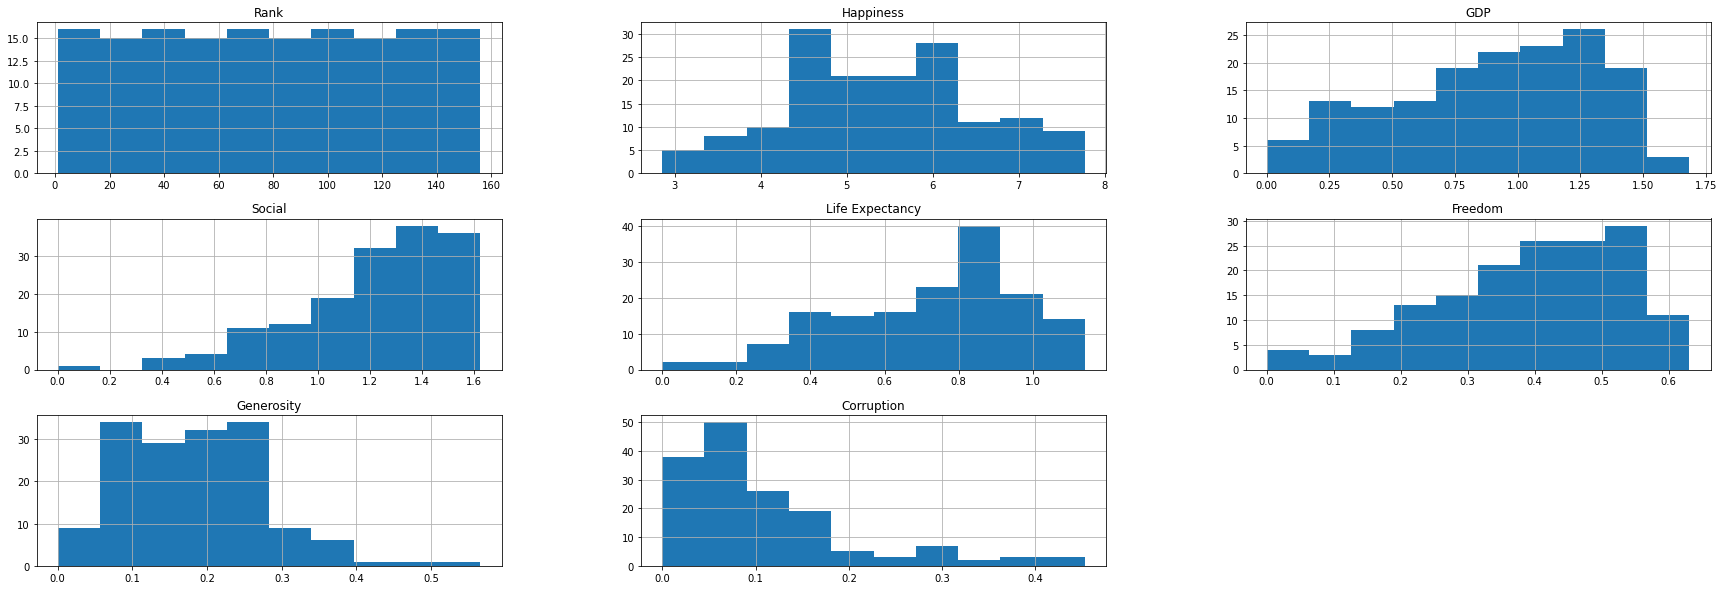

In [69]:
copy19.hist(figsize=(30,10));

## assigning categorical values

In [71]:
# assigning generosity ranking
copy19['Generosity Ranking'] = copy19.apply(lambda row: assignGenerosity(row['Generosity']), axis=1)
copy19[copy19['Generosity Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region, Life Expectancy Ranking, Generosity Ranking]
Index: []

In [72]:
# assigning GDP ranking
copy19['GDP Ranking'] = copy19.apply(lambda row: assignGDP(row['GDP']), axis=1)
copy19[copy19['GDP Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region, Life Expectancy Ranking, Generosity Ranking, GDP Ranking]
Index: []

In [73]:
# assigning Corruption ranking
copy19['Corruption Ranking'] = copy19.apply(lambda row: assignCorruption(row['Corruption']), axis=1)
copy19[copy19['Corruption Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region, Life Expectancy Ranking, Generosity Ranking, GDP Ranking, Corruption Ranking]
Index: []

In [74]:
# assigning Freedom ranking
copy19['Freedom Ranking'] = copy19.apply(lambda row: assignFreedom(row['Freedom']), axis=1)
copy19[copy19['Freedom Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region, Life Expectancy Ranking, Generosity Ranking, GDP Ranking, Corruption Ranking, Freedom Ranking]
Index: []

In [70]:
# assigning Life Expectancy ranking
copy19['Life Expectancy Ranking'] = copy19.apply(lambda row: assignLifeExpectancy(row['Life Expectancy']), axis=1)
copy19[copy19['Life Expectancy Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region, Life Expectancy Ranking]
Index: []

In [75]:
# assigning Happiness ranking
copy19['Happiness Ranking'] = copy19.apply(lambda row: assignHappiness(row['Happiness']), axis=1)
copy19[copy19['Happiness Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region, Life Expectancy Ranking, Generosity Ranking, GDP Ranking, Corruption Ranking, Freedom Ranking, Happiness Ranking]
Index: []

In [77]:
# assigning Social Support ranking
copy19['Social Support Ranking'] = copy19.apply(lambda row: assignSocialSupport(row['Social']), axis=1)
copy19[copy19['Social Support Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social, Life Expectancy, Freedom, Generosity, Corruption, Region, Life Expectancy Ranking, Generosity Ranking, GDP Ranking, Corruption Ranking, Freedom Ranking, Happiness Ranking, Social Support Ranking]
Index: []

In [78]:
copy19

Rank                   Country  ...  Happiness Ranking  Social Support Ranking
0       1                   Finland  ...               High                    High
1       2                   Denmark  ...               High                    High
2       3                    Norway  ...               High                    High
3       4                   Iceland  ...               High                    High
4       5               Netherlands  ...               High                    High
..    ...                       ...  ...                ...                     ...
151   152                    Rwanda  ...                Low                     Low
152   153                  Tanzania  ...                Low                     Low
153   154               Afghanistan  ...                Low                     Low
154   155  Central African Republic  ...                Low                     Low
155   156               South Sudan  ...                Low                     Low

[156 rows x 17 columns]

## Graphs

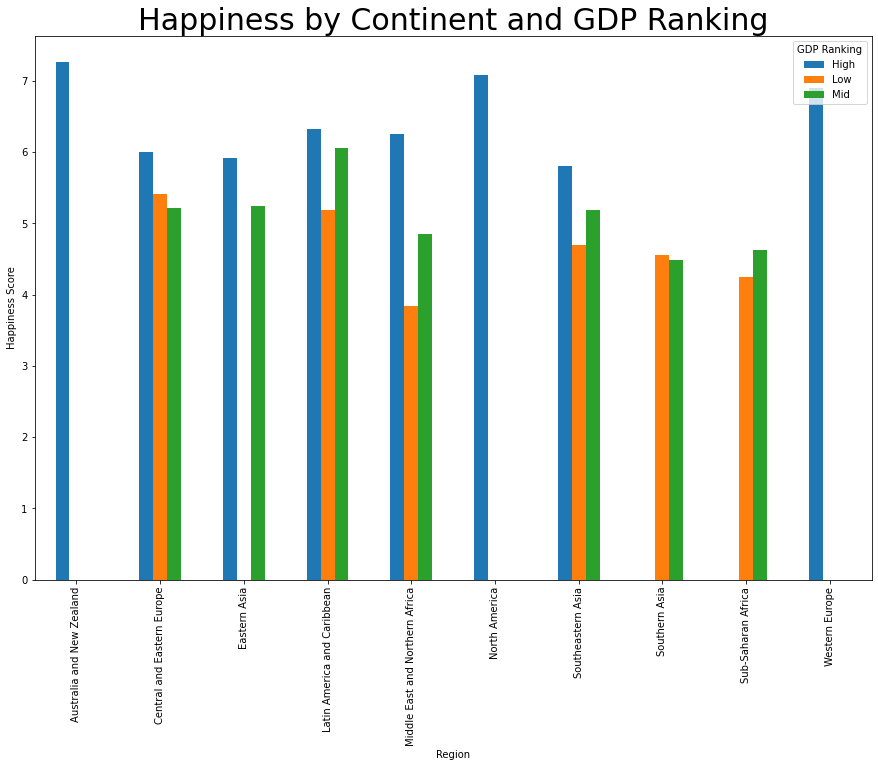

In [109]:
pd.crosstab(index= copy19['Region'],
            columns= copy19['GDP Ranking'],
            values= copy19['Happiness'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(15,10))
plt.title('Happiness by Continent and GDP Ranking', fontsize=30);
plt.ylabel('Happiness Score');

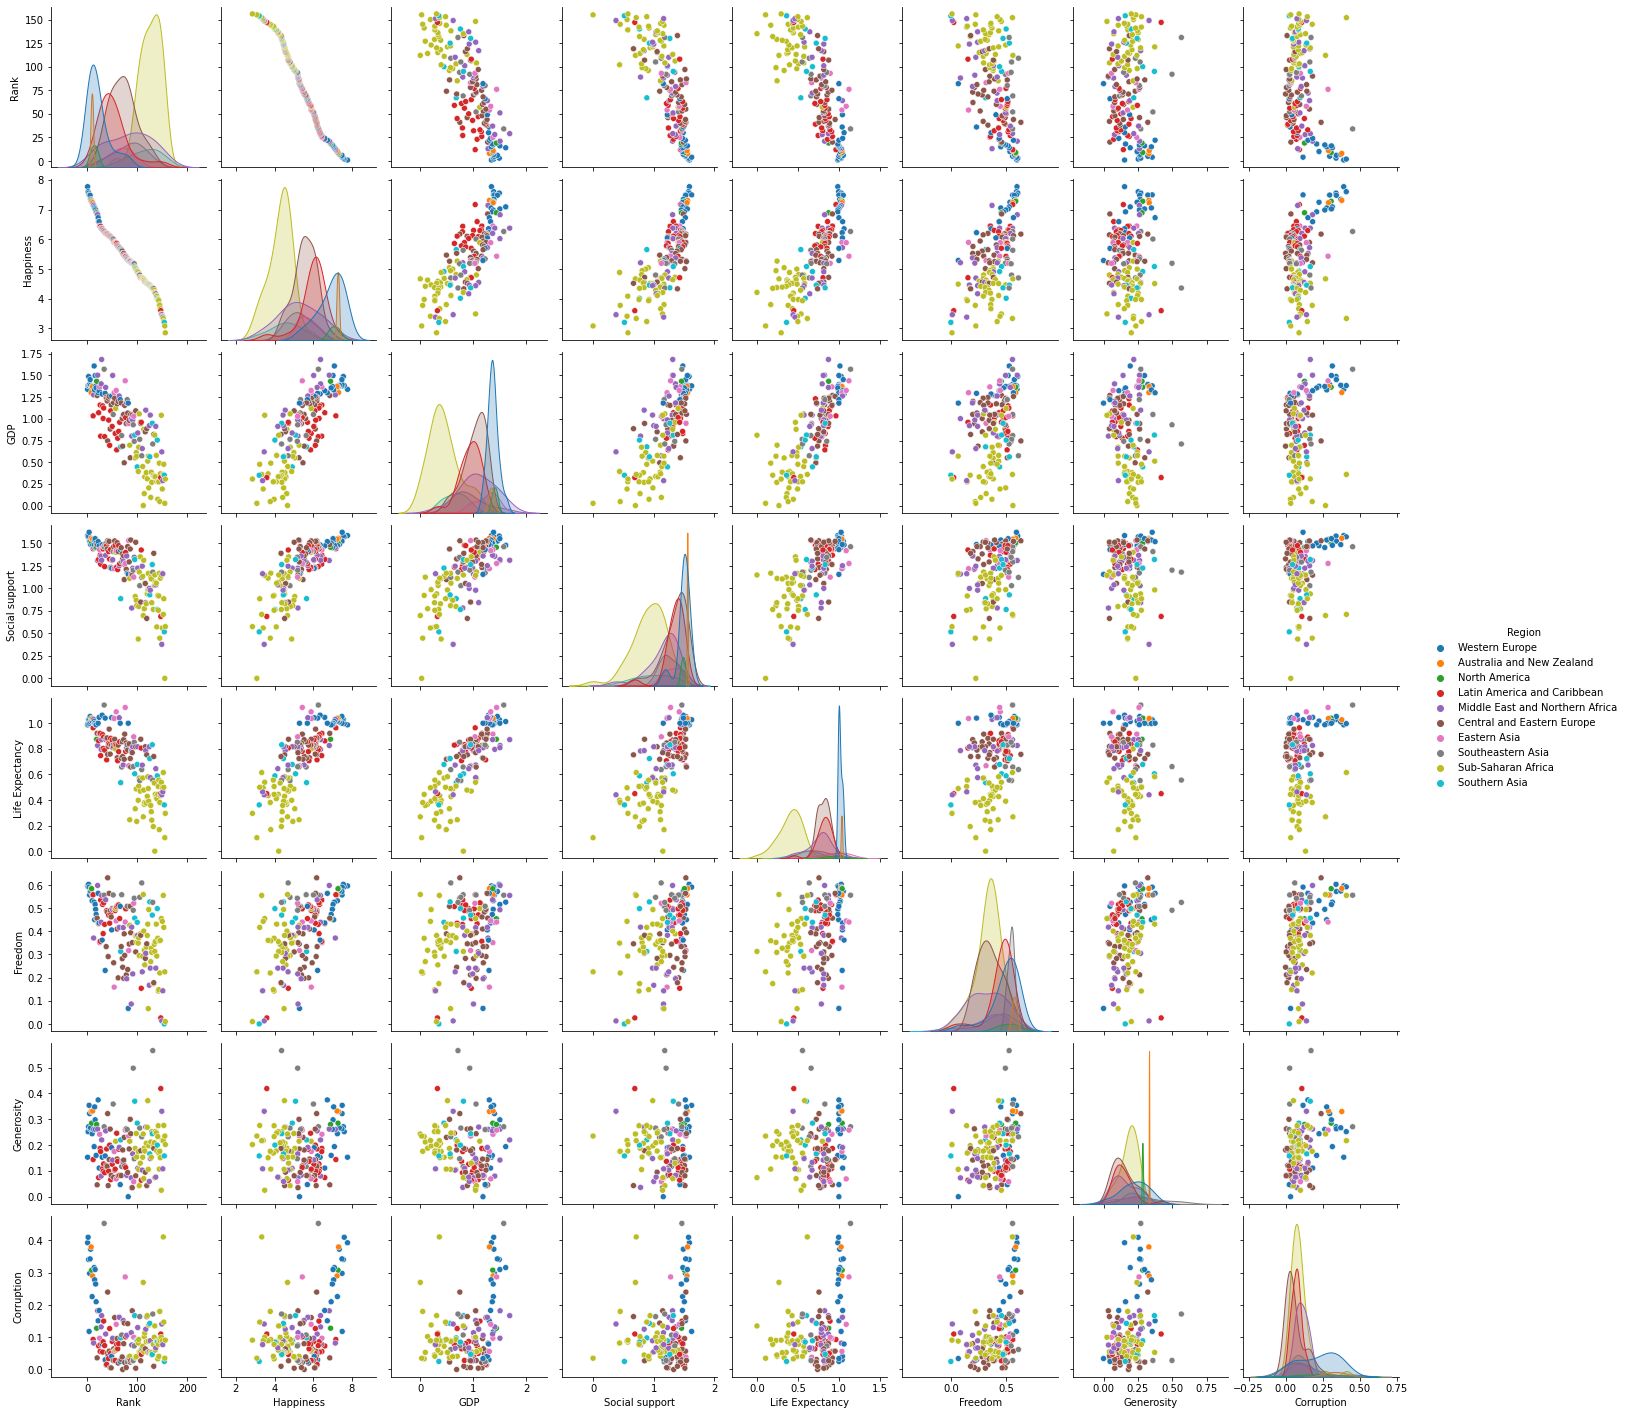

In [113]:
sns.pairplot(copy19, hue = 'Region');

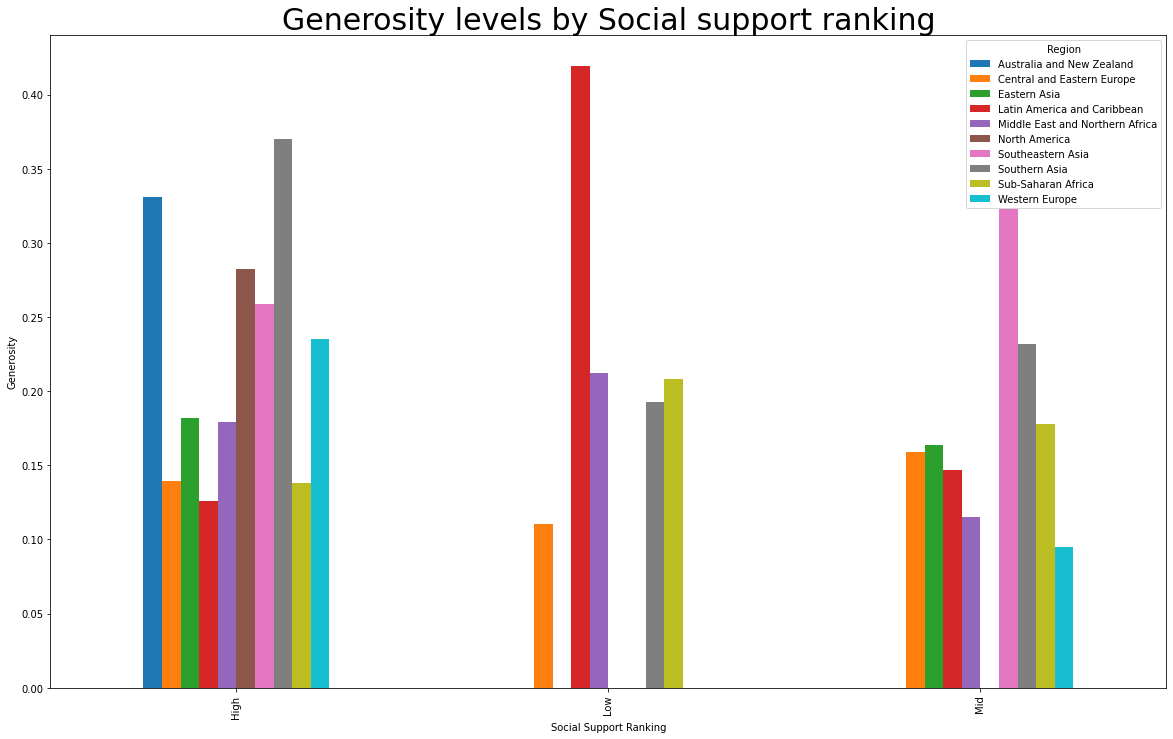

In [79]:
pd.crosstab(index= copy19['Social Support Ranking'],
            columns= copy19['Region'],
            values= copy19['Generosity'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,12))
plt.title('Generosity levels by Social support ranking', fontsize=30);
plt.ylabel('Generosity');

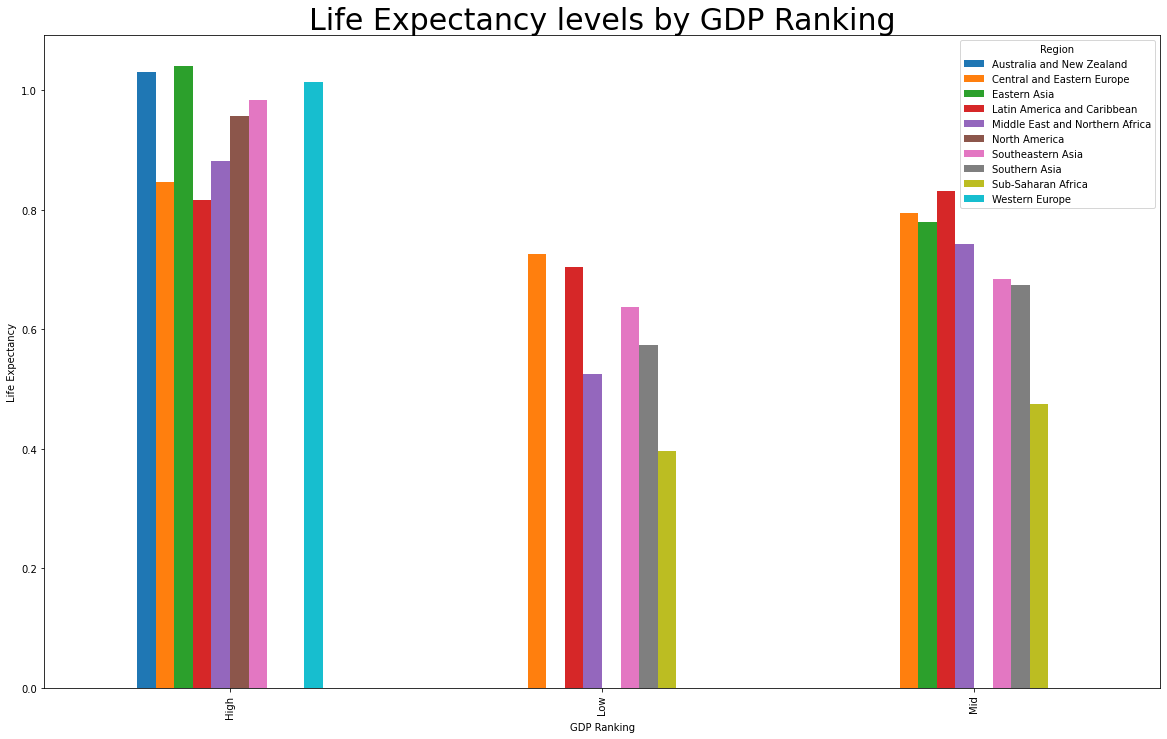

In [121]:
pd.crosstab(index= copy19['GDP Ranking'],
            columns= copy19['Region'],
            values= copy19['Life Expectancy'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,12))
plt.title('Life Expectancy levels by GDP Ranking', fontsize=30);
plt.ylabel('Life Expectancy');

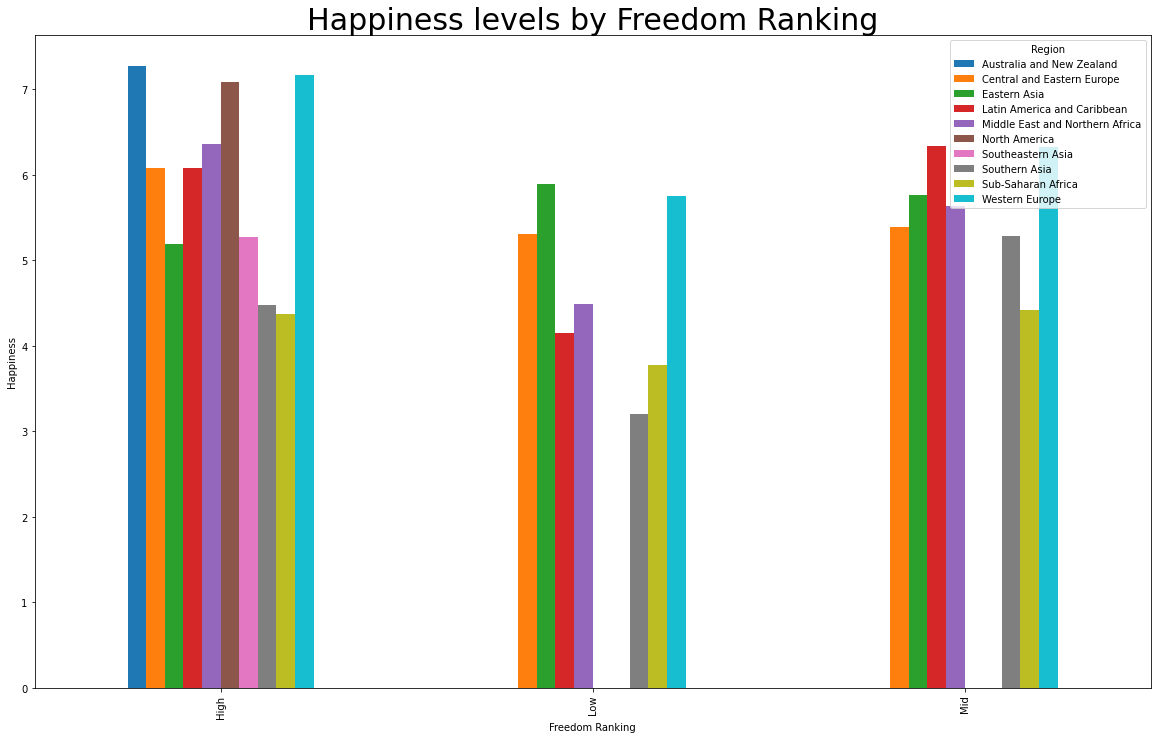

In [124]:
pd.crosstab(index= copy19['Freedom Ranking'],
            columns= copy19['Region'],
            values= copy19['Happiness'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,12))
plt.title('Happiness levels by Freedom Ranking', fontsize=30);
plt.ylabel('Happiness');

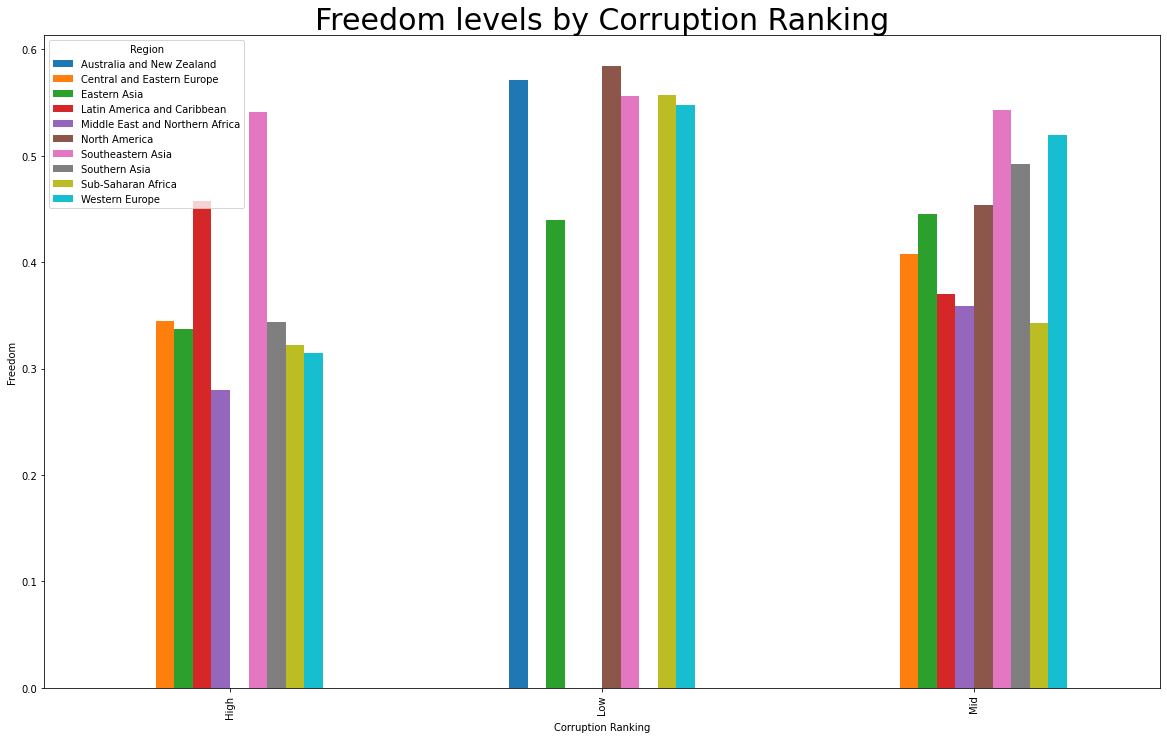

In [81]:
pd.crosstab(index= copy19['Corruption Ranking'],
            columns= copy19['Region'],
            values= copy19['Freedom'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,12))
plt.title('Freedom levels by Corruption Ranking', fontsize=30);
plt.ylabel('Freedom');

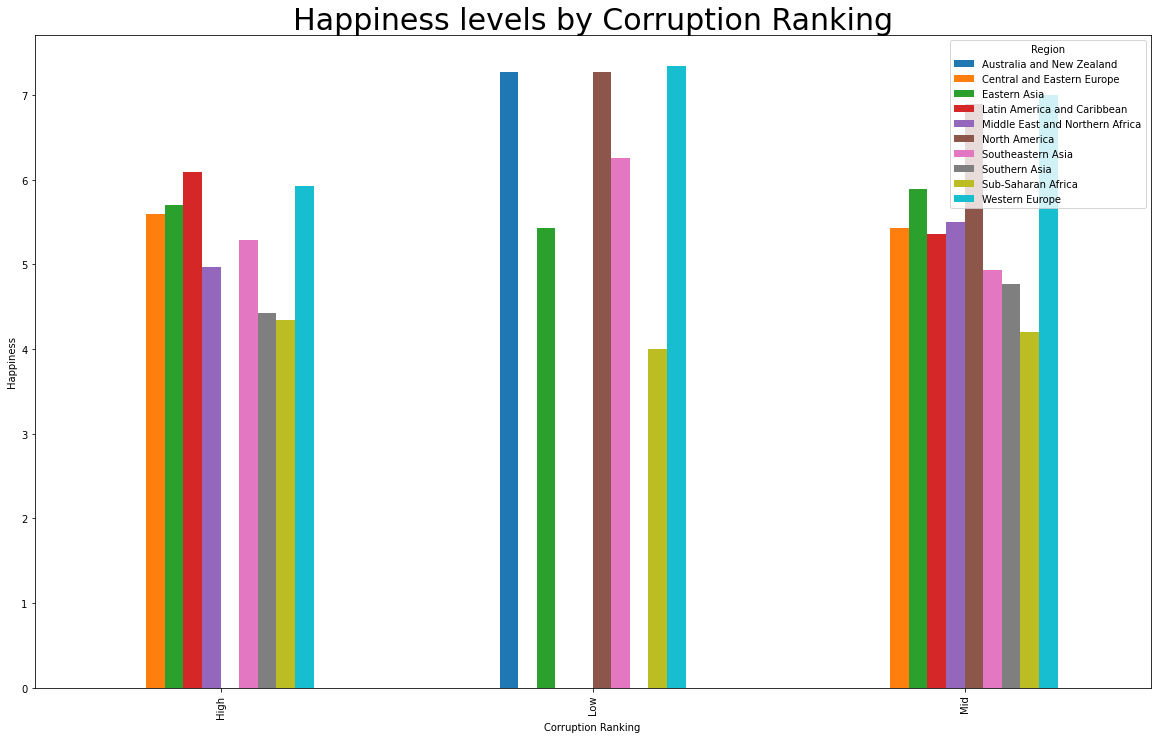

In [84]:
pd.crosstab(index= copy19['Corruption Ranking'],
            columns= copy19['Region'],
            values= copy19['Happiness'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,12))
plt.title('Happiness levels by Corruption Ranking', fontsize=30);
plt.ylabel('Happiness');

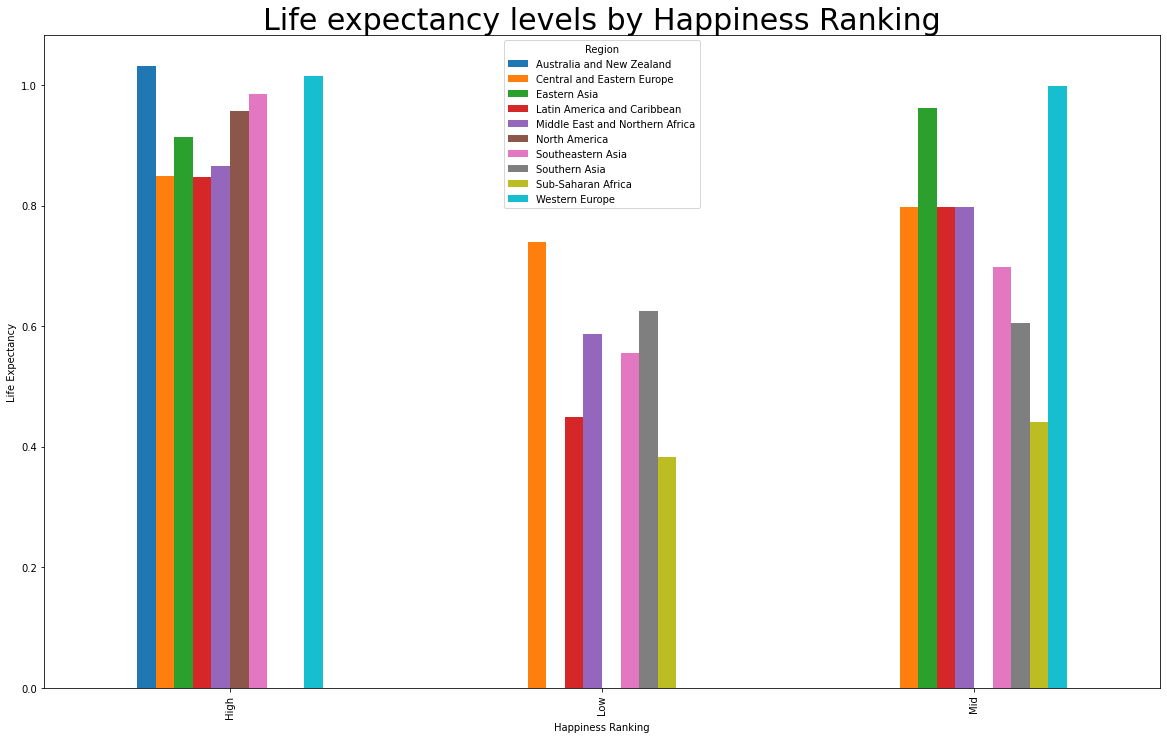

In [87]:
pd.crosstab(index= copy19['Happiness Ranking'],
            columns= copy19['Region'],
            values= copy19['Life Expectancy'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,12))
plt.title('Life expectancy levels by Happiness Ranking', fontsize=30);
plt.ylabel('Life Expectancy');

# <h1><center> 2018 Data Analysis<center><h1>

In [88]:
Ranking18.head()

Overall rank Country or region  ...  Generosity  Perceptions of corruption
0             1           Finland  ...       0.202                      0.393
1             2            Norway  ...       0.286                      0.340
2             3           Denmark  ...       0.284                      0.408
3             4           Iceland  ...       0.353                      0.138
4             5       Switzerland  ...       0.256                      0.357

[5 rows x 9 columns]

In [89]:
Ranking18.shape

(156, 9)

In [90]:
Ranking18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [91]:
Ranking18.isnull().values.any()

True

In [92]:
# UAE has a null value
Ranking18[Ranking18.isna().any(axis=1)]

Overall rank     Country or region  ...  Generosity  Perceptions of corruption
19            20  United Arab Emirates  ...       0.186                        NaN

[1 rows x 9 columns]

In [93]:
Ranking18.describe()

Overall rank       Score  ...  Generosity  Perceptions of corruption
count    156.000000  156.000000  ...  156.000000                 155.000000
mean      78.500000    5.375917  ...    0.181006                   0.112000
std       45.177428    1.119506  ...    0.098471                   0.096492
min        1.000000    2.905000  ...    0.000000                   0.000000
25%       39.750000    4.453750  ...    0.109500                   0.051000
50%       78.500000    5.378000  ...    0.174000                   0.082000
75%      117.250000    6.168500  ...    0.239000                   0.137000
max      156.000000    7.632000  ...    0.598000                   0.457000

[8 rows x 8 columns]

In [315]:
Ranking18.corr()

Rank  Happiness  ...  Generosity  Corruption
Rank             1.000000  -0.991749  ...   -0.103602   -0.368699
Happiness       -0.991749   1.000000  ...    0.135825    0.402840
GDP             -0.805897   0.802124  ...   -0.011241    0.308661
Social support  -0.737500   0.745760  ...    0.018226    0.217328
Life Expectancy -0.778700   0.775814  ...    0.020751    0.315387
Freedom         -0.530786   0.544280  ...    0.297988    0.461113
Generosity      -0.103602   0.135825  ...    1.000000    0.362227
Corruption      -0.368699   0.402840  ...    0.362227    1.000000

[8 rows x 8 columns]

In [96]:
# renaming columns
Ranking18.rename(columns={'Overall rank': 'Rank', 'Country or region': 'Country', 'Score':'Happiness', 'GDP per capita':'GDP', 'Healthy life expectancy':'Life Expectancy', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Corruption',}, inplace=True)
Ranking18.head()

Rank      Country  Happiness  ...  Freedom  Generosity  Corruption
0     1      Finland      7.632  ...    0.681       0.202       0.393
1     2       Norway      7.594  ...    0.686       0.286       0.340
2     3      Denmark      7.555  ...    0.683       0.284       0.408
3     4      Iceland      7.495  ...    0.677       0.353       0.138
4     5  Switzerland      7.487  ...    0.660       0.256       0.357

[5 rows x 9 columns]

In [97]:
# filling corruption missing value with an average of close by middle eastern countries
Ranking18.Corruption[(Ranking18.Country == 'United Arab Emirates')] = Ranking18.Corruption[(Ranking18.Country == 'Kuwait') | (Ranking18.Country == 'Iraq') | (Ranking18.Country == 'Saudi Arabia') | (Ranking18.Country == 'Oman') | (Ranking18.Country == 'Bahrain') | (Ranking18.Country == 'Iran') | (Ranking18.Country == 'Yemen')].sum() / 6
Ranking18[Ranking18.isna().any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption]
Index: []

In [ ]:
# creating lists containing country names by continent
'''
northAmerica = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States of America']
southAmerica = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom','Vatican City']
oceania = ['Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu']
asia = ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia','China','Cyprus','Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar (Burma)','Nepal','North Korea','Oman','Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea','Sri Lanka','Syria','Taiwan','Tajikistan','Thailand','Timor-Leste','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen']
africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon'',Central African Republic','Chad','Comoros','Democratic Republic of the Congo','Republic of the Congo','Djibouti','Egypt','Equatorial Guinea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra' 'Leone','Somalia','South Africa','South Sudan','Sudan','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe']
'''

In [ ]:
# converting list values to lowercase
'''
northAmerica = [x.lower() for x in northAmerica]
southAmerica = [x.lower() for x in southAmerica]
europe = [x.lower() for x in europe]
oceania = [x.lower() for x in oceania]
asia = [x.lower() for x in asia]
africa = [x.lower() for x in africa]
'''

In [ ]:
# function to assign continents to country
'''
def assignContinent(country):
  if(country.lower() in northAmerica):
    return 'North America'
  elif(country.lower() in southAmerica):
    return 'South America'
  elif(country.lower() in oceania):
    return 'Oceania'
  elif(country.lower() in africa):
    return 'Africa'
  elif(country.lower() in europe):
    return 'Europe'
  if(country.lower() in asia):
    return 'Asia'
  else:
    return 'none'
'''

In [ ]:
# applying function to each row
# Ranking18['Continent'] = Ranking18.apply(lambda row: assignContinent(row['Country']), axis=1)

In [98]:
copy18 = Ranking18.copy()

In [99]:
copy18['Region'] = copy18.apply(lambda row: assignRegion(row['Country']), axis=1)
copy18

Rank  ...                           Region
0       1  ...                   Western Europe
1       2  ...                   Western Europe
2       3  ...                   Western Europe
3       4  ...                   Western Europe
4       5  ...                   Western Europe
..    ...  ...                              ...
151   152  ...  Middle East and Northern Africa
152   153  ...               Sub-Saharan Africa
153   154  ...               Sub-Saharan Africa
154   155  ...                        Undefined
155   156  ...               Sub-Saharan Africa

[156 rows x 10 columns]

In [100]:
# checking for any null regional values
copy18[copy18.Region == 'Undefined']

Rank                   Country  ...  Corruption     Region
37     38         Trinidad & Tobago  ...       0.019  Undefined
57     58           Northern Cyprus  ...       0.154  Undefined
122   123                Mozambique  ...       0.158  Undefined
140   141                   Lesotho  ...       0.112  Undefined
154   155  Central African Republic  ...       0.038  Undefined

[5 rows x 10 columns]

In [101]:
# manually filling null regional values
copy18.Region.loc[copy18['Country'] == 'Trinidad & Tobago'] = 'Latin America and Caribbean'
copy18.Region.loc[copy18['Country'] == 'Northern Cyprus'] = 'Middle East and Northern Africa'
copy18.Region.loc[copy18['Country'] == 'Mozambique'] = 'Sub-Saharan Africa' 
copy18.Region.loc[copy18['Country'] == 'Lesotho'] = 'Sub-Saharan Africa'
copy18.Region.loc[copy18['Country'] == 'Central African Republic'] = 'Sub-Saharan Africa'

copy18[copy18.Region == 'Undefined']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region]
Index: []

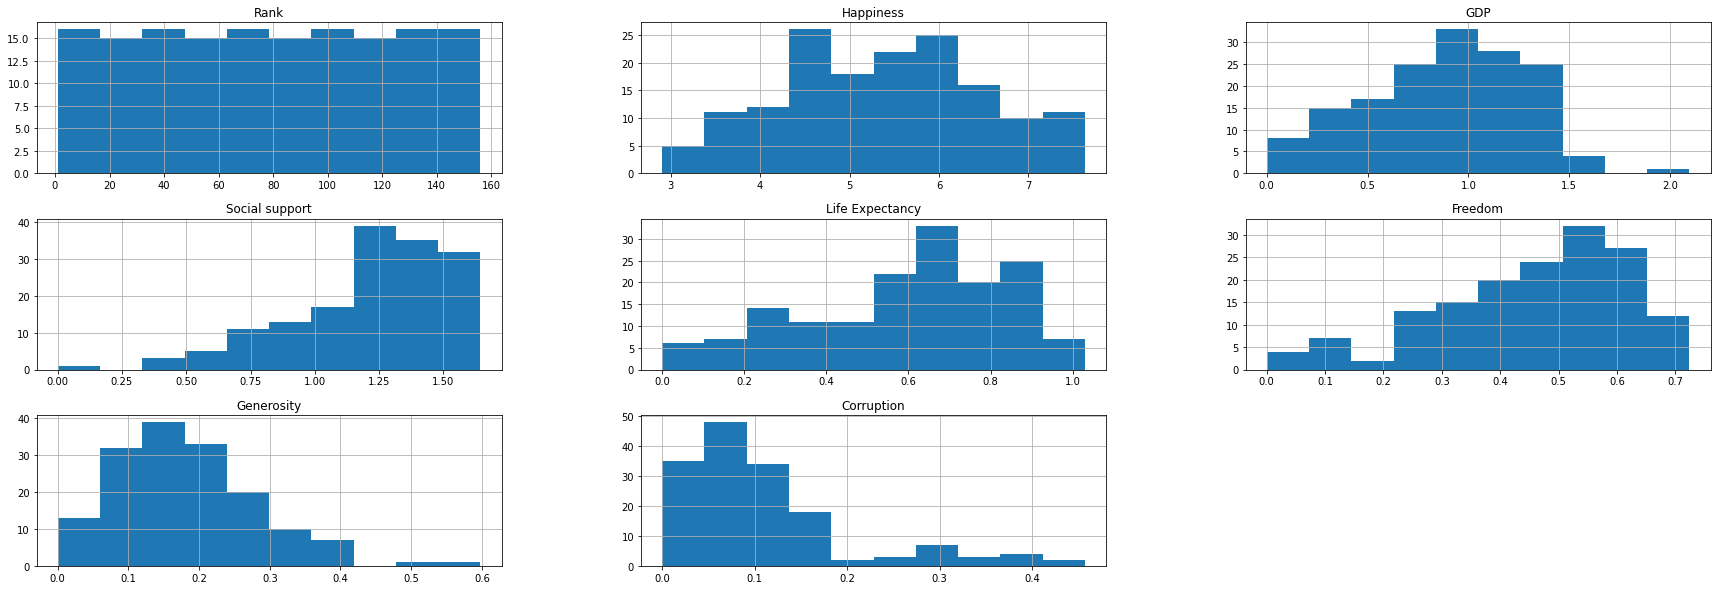

In [102]:
copy18.hist(figsize=(30,10));

## assigning categorical values

In [103]:
copy18['Happiness Ranking'] = copy18.apply(lambda row: assignHappiness(row['Happiness']), axis=1)
copy18[copy18['Happiness Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region, Happiness Ranking]
Index: []

In [104]:
copy18['Generosity Ranking'] = copy18.apply(lambda row: assignGenerosity(row['Generosity']), axis=1)
copy18[copy18['Generosity Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region, Happiness Ranking, Generosity Ranking]
Index: []

In [105]:
copy18['Corruption Ranking'] = copy18.apply(lambda row: assignCorruption(row['Corruption']), axis=1)
copy18[copy18['Corruption Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking]
Index: []

In [106]:
copy18['Freedom Ranking'] = copy18.apply(lambda row: assignFreedom(row['Freedom']), axis=1)
copy18[copy18['Freedom Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking]
Index: []

In [107]:
copy18['GDP Ranking'] = copy18.apply(lambda row: assignGDP(row['GDP']), axis=1)
copy18[copy18['GDP Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking]
Index: []

In [108]:
copy18['Life Expectancy Ranking'] = copy18.apply(lambda row: assignLifeExpectancy(row['Life Expectancy']), axis=1)
copy18[copy18['Life Expectancy Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking, Life Expectancy Ranking]
Index: []

In [109]:
copy18['Social support Ranking'] = copy18.apply(lambda row: assignSocialSupport(row['Social support']), axis=1)
copy18[copy18['Social support Ranking'] == 'none']

Empty DataFrame
Columns: [Rank, Country, Happiness, GDP, Social support, Life Expectancy, Freedom, Generosity, Corruption, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking, Life Expectancy Ranking, Social support Ranking]
Index: []

In [110]:
copy18

Rank  ... Social support Ranking
0       1  ...                   High
1       2  ...                   High
2       3  ...                   High
3       4  ...                   High
4       5  ...                   High
..    ...  ...                    ...
151   152  ...                    Mid
152   153  ...                    Mid
153   154  ...                    Low
154   155  ...                    Low
155   156  ...                    Low

[156 rows x 17 columns]

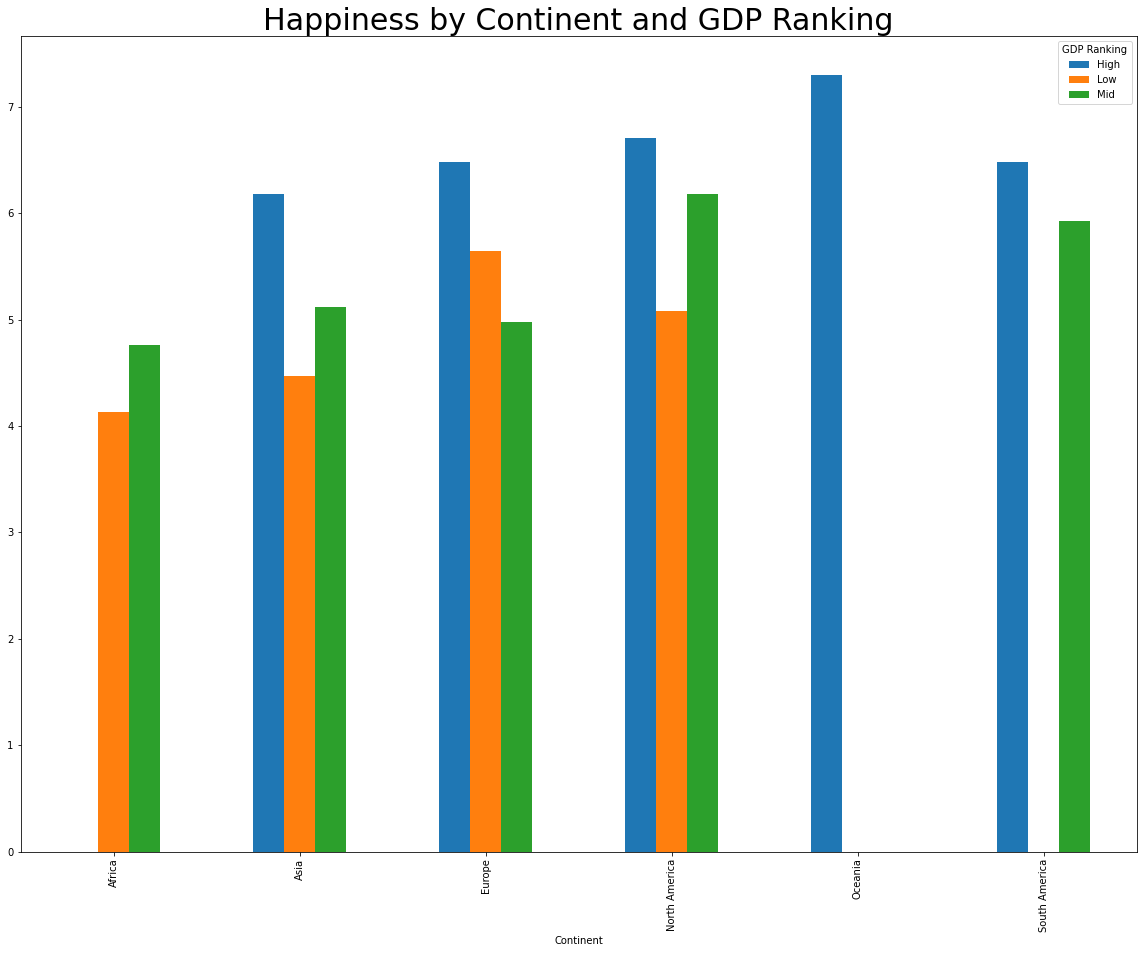

In [ ]:
pd.crosstab(index= Ranking18['Continent'],
            columns= Ranking18['GDP Ranking'],
            values= Ranking18['Happiness'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,15))
plt.title('Happiness by Continent and GDP Ranking', fontsize=30);

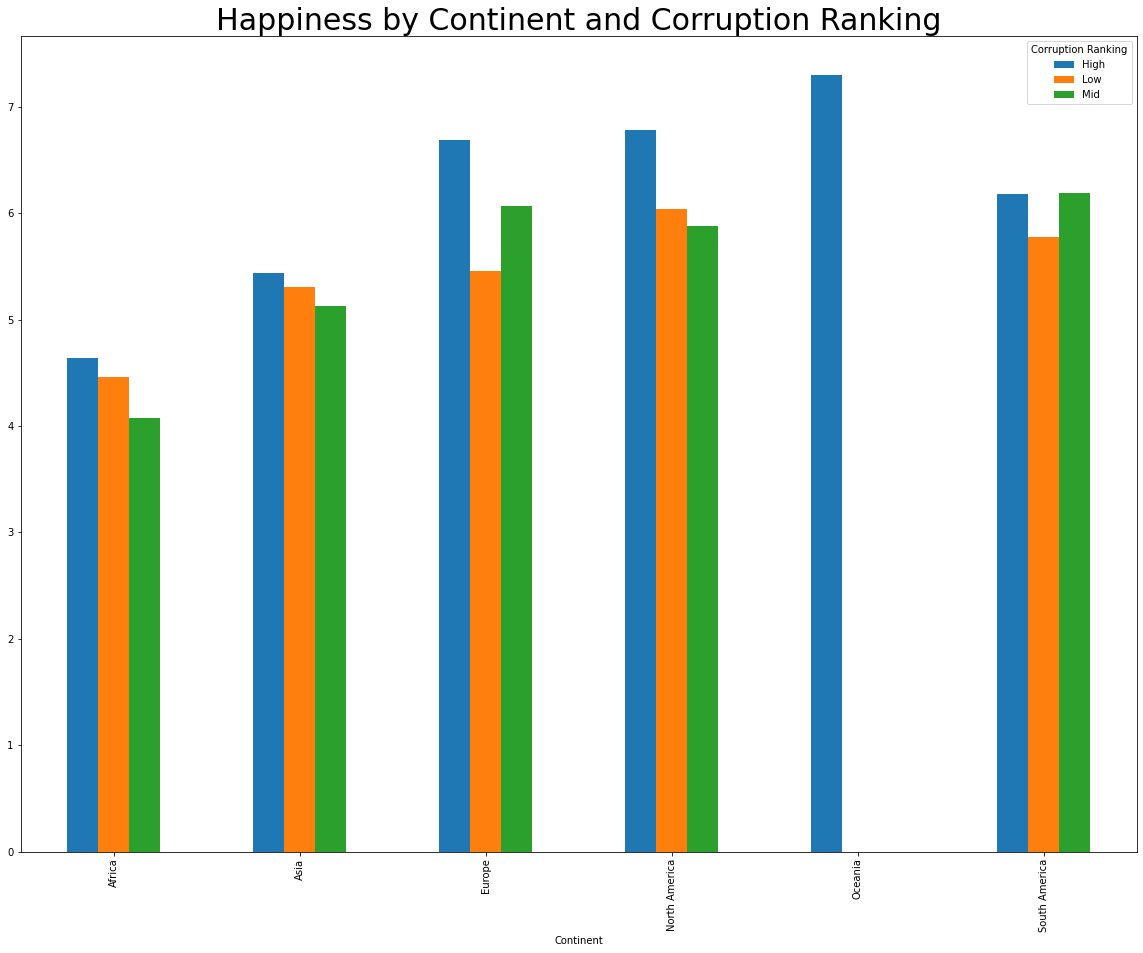

In [ ]:
pd.crosstab(index= Ranking18['Continent'],
            columns= Ranking18['Corruption Ranking'],
            values= Ranking18['Happiness'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,15))
plt.title('Happiness by Continent and Corruption Ranking', fontsize=30);

In [111]:
Ranking18.sort_values(by=['Corruption'])

Rank                 Country  Happiness  ...  Freedom  Generosity  Corruption
66     67                 Moldova      5.640  ...    0.232       0.171       0.000
92     93  Bosnia and Herzegovina      5.129  ...    0.280       0.216       0.000
51     52                 Romania      5.945  ...    0.528       0.088       0.001
49     50               Lithuania      5.952  ...    0.350       0.026       0.006
99    100                Bulgaria      4.933  ...    0.359       0.064       0.009
..    ...                     ...        ...  ...      ...         ...         ...
7       8             New Zealand      7.324  ...    0.669       0.365       0.389
0       1                 Finland      7.632  ...    0.681       0.202       0.393
2       3                 Denmark      7.555  ...    0.683       0.284       0.408
150   151                  Rwanda      3.408  ...    0.636       0.200       0.444
33     34               Singapore      6.343  ...    0.631       0.261       0.457

[156 rows x 9 columns]

In [112]:
Ranking18.sort_values(by=['Happiness'])

Rank                   Country  Happiness  ...  Freedom  Generosity  Corruption
155   156                   Burundi      2.905  ...    0.065       0.149       0.076
154   155  Central African Republic      3.083  ...    0.305       0.218       0.038
153   154               South Sudan      3.254  ...    0.112       0.224       0.106
152   153                  Tanzania      3.303  ...    0.481       0.270       0.097
151   152                     Yemen      3.355  ...    0.244       0.083       0.064
..    ...                       ...        ...  ...      ...         ...         ...
4       5               Switzerland      7.487  ...    0.660       0.256       0.357
3       4                   Iceland      7.495  ...    0.677       0.353       0.138
2       3                   Denmark      7.555  ...    0.683       0.284       0.408
1       2                    Norway      7.594  ...    0.686       0.286       0.340
0       1                   Finland      7.632  ...    0.681       0.202       0.393

[156 rows x 9 columns]

In [113]:
Ranking18.sort_values(by=['GDP'])

Rank                   Country  Happiness  ...  Freedom  Generosity  Corruption
97     98                   Somalia      4.982  ...    0.674       0.238    0.282000
154   155  Central African Republic      3.083  ...    0.305       0.218    0.038000
131   132          Congo (Kinshasa)      4.245  ...    0.312       0.197    0.052000
148   149                   Liberia      3.495  ...    0.419       0.206    0.030000
155   156                   Burundi      2.905  ...    0.065       0.149    0.076000
..    ...                       ...        ...  ...      ...         ...         ...
44     45                    Kuwait      6.083  ...    0.554       0.167    0.106000
33     34                 Singapore      6.343  ...    0.631       0.261    0.457000
16     17                Luxembourg      6.910  ...    0.632       0.196    0.321000
31     32                     Qatar      6.374  ...    0.654       0.256    0.171000
19     20      United Arab Emirates      6.774  ...    0.284       0.186    0.107333

[156 rows x 9 columns]

In [118]:
Ranking18.sort_values(by=['Generosity'])

Rank     Country  Happiness  ...  Freedom  Generosity  Corruption
78     79      Greece      5.358  ...    0.131       0.000       0.044
84     85     Morocco      5.254  ...    0.460       0.026       0.074
49     50   Lithuania      5.952  ...    0.350       0.026       0.006
85     86       China      5.246  ...    0.597       0.029       0.103
86     87  Azerbaijan      5.201  ...    0.430       0.031       0.176
..    ...         ...        ...  ...      ...         ...         ...
21     22       Malta      6.627  ...    0.645       0.376       0.142
149   150       Syria      3.462  ...    0.088       0.376       0.144
147   148       Haiti      3.582  ...    0.025       0.392       0.104
95     96   Indonesia      5.093  ...    0.538       0.484       0.018
129   130     Myanmar      4.308  ...    0.580       0.598       0.178

[156 rows x 9 columns]

# <h1><center> 2017 Data Analysis<center><h1>

In [119]:
Ranking17.head()

Country  ...  Dystopia.Residual
0       Norway  ...           2.277027
1      Denmark  ...           2.313707
2      Iceland  ...           2.322715
3  Switzerland  ...           2.276716
4      Finland  ...           2.430182

[5 rows x 12 columns]

In [120]:
Ranking17.shape

(155, 12)

In [121]:
Ranking17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [122]:
Ranking17.isnull().values.any()

False

In [316]:
Ranking17.corr()

Happiness.Rank  ...  Dystopia.Residual
Happiness.Rank                       1.000000  ...          -0.484506
Happiness.Score                     -0.992774  ...           0.475355
Whisker.high                        -0.993058  ...           0.478824
Whisker.low                         -0.991533  ...           0.471505
Economy..GDP.per.Capita.            -0.813244  ...           0.024226
Family                              -0.736753  ...           0.070506
Health..Life.Expectancy.            -0.780716  ...           0.054963
Freedom                             -0.551608  ...           0.081926
Generosity                          -0.132620  ...          -0.116627
Trust..Government.Corruption.       -0.405842  ...          -0.022755
Dystopia.Residual                   -0.484506  ...           1.000000

[11 rows x 11 columns]

In [123]:
Ranking17.describe()

Happiness.Rank  ...  Dystopia.Residual
count      155.000000  ...         155.000000
mean        78.000000  ...           1.850238
std         44.888751  ...           0.500028
min          1.000000  ...           0.377914
25%         39.500000  ...           1.591291
50%         78.000000  ...           1.832910
75%        116.500000  ...           2.144654
max        155.000000  ...           3.117485

[8 rows x 11 columns]

In [124]:
Ranking17[Ranking17.isna().any(axis=1)]

Empty DataFrame
Columns: [Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual]
Index: []

In [125]:
copy17 = Ranking17.copy()

In [127]:
# creting regionl column
copy17['Region'] = copy17.apply(lambda row: assignRegion(row['Country']), axis=1)
copy17[copy17.Region == 'Undefined']

Country  Happiness.Rank  ...  Dystopia.Residual     Region
32   Taiwan Province of China              33  ...           2.126607  Undefined
70    Hong Kong S.A.R., China              71  ...           0.554633  Undefined
112                Mozambique             113  ...           2.355651  Undefined
138                   Lesotho             139  ...           1.429835  Undefined
154  Central African Republic             155  ...           2.066005  Undefined

[5 rows x 13 columns]

In [128]:
# manually fillin null regionla values
copy17.Region.loc[copy17['Country'] == 'Taiwan Province of China'] = 'Eastern Asia'
copy17.Region.loc[copy17['Country'] == 'Hong Kong S.A.R., China'] = 'Eastern Asia'
copy17.Region.loc[copy17['Country'] == 'Mozambique'] = 'Sub-Saharan Africa' 
copy17.Region.loc[copy17['Country'] == 'Lesotho'] = 'Sub-Saharan Africa'
copy17.Region.loc[copy17['Country'] == 'Central African Republic'] = 'Sub-Saharan Africa'

copy17[copy17.Region == 'Undefined']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Empty DataFrame
Columns: [Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual, Region]
Index: []

In [129]:
# renaming columns
copy17.rename(columns={'Happiness.Rank': 'Happiness rank', 'Happiness.Score': 'Happiness', 'Economy..GDP.per.Capita.':'GDP', 'Health..Life.Expectancy.':'Life Expectancy', 'Healthy life expectancy':'Life Expectancy', 'Trust..Government.Corruption.':'Corruption', 'Dystopia.Residual':'Dystopia',}, inplace=True)

In [130]:
copy17

Country  ...                           Region
0                      Norway  ...                   Western Europe
1                     Denmark  ...                   Western Europe
2                     Iceland  ...                   Western Europe
3                 Switzerland  ...                   Western Europe
4                     Finland  ...                   Western Europe
..                        ...  ...                              ...
150                    Rwanda  ...               Sub-Saharan Africa
151                     Syria  ...  Middle East and Northern Africa
152                  Tanzania  ...               Sub-Saharan Africa
153                   Burundi  ...               Sub-Saharan Africa
154  Central African Republic  ...               Sub-Saharan Africa

[155 rows x 13 columns]

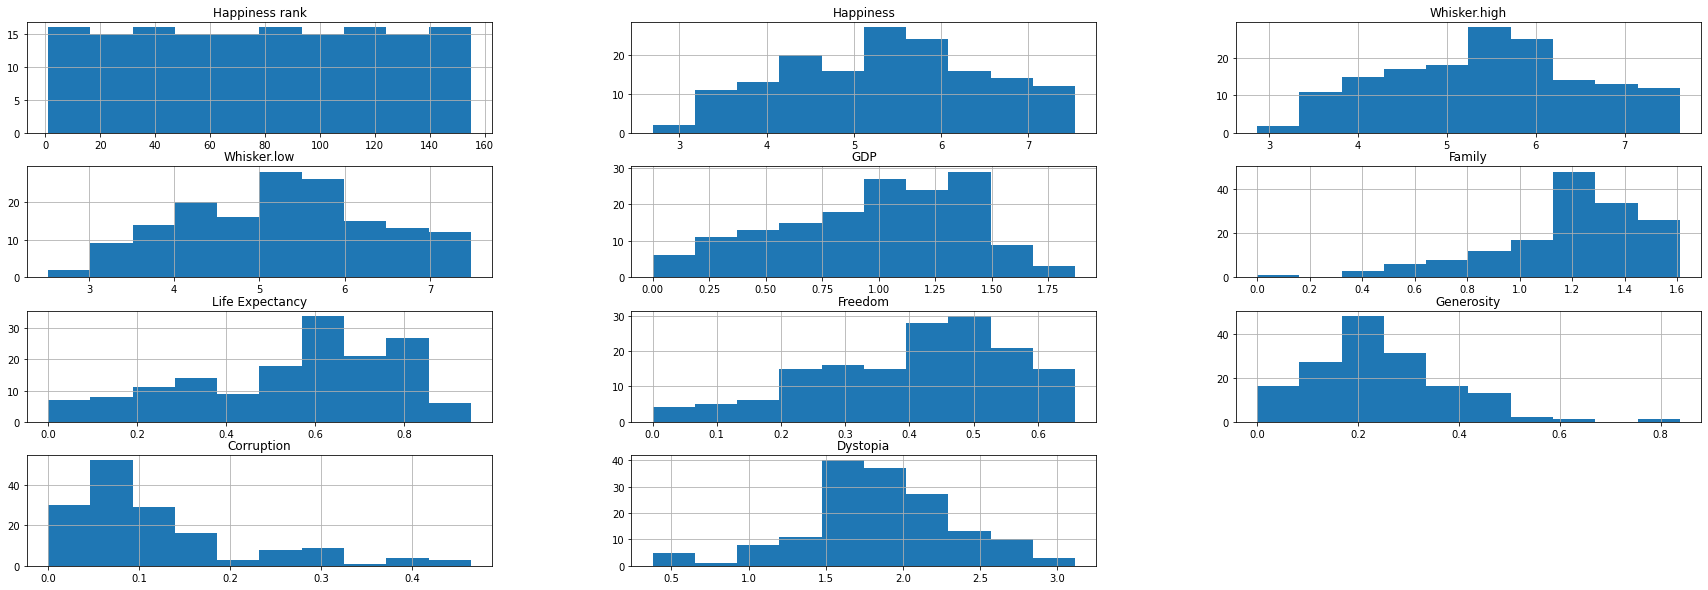

In [48]:
copy17.hist(figsize=(30,10));

## assigning categorical values

In [131]:
copy17['Happiness Ranking'] = copy17.apply(lambda row: assignHappiness(row['Happiness']), axis=1)
copy17[copy17['Happiness Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Happiness rank, Happiness, Whisker.high, Whisker.low, GDP, Family, Life Expectancy, Freedom, Generosity, Corruption, Dystopia, Region, Happiness Ranking]
Index: []

In [132]:
copy17['Generosity Ranking'] = copy17.apply(lambda row: assignGenerosity(row['Generosity']), axis=1)
copy17[copy17['Generosity Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Happiness rank, Happiness, Whisker.high, Whisker.low, GDP, Family, Life Expectancy, Freedom, Generosity, Corruption, Dystopia, Region, Happiness Ranking, Generosity Ranking]
Index: []

In [133]:
copy17['Corruption Ranking'] = copy17.apply(lambda row: assignCorruption(row['Corruption']), axis=1)
copy17[copy17['Corruption Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Happiness rank, Happiness, Whisker.high, Whisker.low, GDP, Family, Life Expectancy, Freedom, Generosity, Corruption, Dystopia, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking]
Index: []

In [134]:
copy17['Freedom Ranking'] = copy17.apply(lambda row: assignFreedom(row['Freedom']), axis=1)
copy17[copy17['Freedom Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Happiness rank, Happiness, Whisker.high, Whisker.low, GDP, Family, Life Expectancy, Freedom, Generosity, Corruption, Dystopia, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking]
Index: []

In [135]:
copy17['GDP Ranking'] = copy17.apply(lambda row: assignGDP(row['GDP']), axis=1)
copy17[copy17['GDP Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Happiness rank, Happiness, Whisker.high, Whisker.low, GDP, Family, Life Expectancy, Freedom, Generosity, Corruption, Dystopia, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking]
Index: []

In [136]:
copy17['Life Expectancy Ranking'] = copy17.apply(lambda row: assignLifeExpectancy(row['Life Expectancy']), axis=1)
copy17[copy17['Life Expectancy Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Happiness rank, Happiness, Whisker.high, Whisker.low, GDP, Family, Life Expectancy, Freedom, Generosity, Corruption, Dystopia, Region, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking, Life Expectancy Ranking]
Index: []

In [140]:
copy17.sort_values(by=['Happiness'])

Country  ...  Life Expectancy Ranking
154  Central African Republic  ...                      Low
153                   Burundi  ...                      Low
152                  Tanzania  ...                      Low
151                     Syria  ...                      Mid
150                    Rwanda  ...                      Low
..                        ...  ...                      ...
4                     Finland  ...                     High
3                 Switzerland  ...                     High
2                     Iceland  ...                     High
1                     Denmark  ...                      Mid
0                      Norway  ...                      Mid

[155 rows x 19 columns]

In [139]:
copy17.sort_values(by=['Generosity'])

Country  Happiness rank  ...  GDP Ranking  Life Expectancy Ranking
86        Greece              87  ...         High                     High
51     Lithuania              52  ...         High                      Mid
78         China              79  ...          Mid                      Mid
83       Morocco              84  ...          Mid                      Mid
117        Gabon             118  ...         High                      Low
..           ...             ...  ...          ...                      ...
7    New Zealand               8  ...         High                     High
31      Thailand              32  ...          Mid                      Mid
26         Malta              27  ...         High                     High
80     Indonesia              81  ...          Mid                      Low
113      Myanmar             114  ...          Low                      Low

[155 rows x 19 columns]

In [141]:
copy17.sort_values(by=['GDP'])

Country  ...  Life Expectancy Ranking
154  Central African Republic  ...                      Low
92                    Somalia  ...                      Low
153                   Burundi  ...                      Low
125          Congo (Kinshasa)  ...                      Low
147                   Liberia  ...                      Low
..                        ...  ...                      ...
20       United Arab Emirates  ...                      Mid
38                     Kuwait  ...                      Mid
25                  Singapore  ...                     High
17                 Luxembourg  ...                     High
34                      Qatar  ...                      Mid

[155 rows x 19 columns]

In [142]:
copy17.sort_values(by=['Freedom'])

Country  Happiness rank  ...  GDP Ranking  Life Expectancy Ranking
139      Angola             140  ...          Mid                      Low
129       Sudan             130  ...          Low                      Low
144       Haiti             145  ...          Low                      Low
153     Burundi             154  ...          Low                      Low
151       Syria             152  ...          Mid                      Mid
..          ...             ...  ...          ...                      ...
1       Denmark               2  ...         High                      Mid
2       Iceland               3  ...         High                     High
128    Cambodia             129  ...          Low                      Low
0        Norway               1  ...         High                      Mid
46   Uzbekistan              47  ...          Mid                      Low

[155 rows x 19 columns]

In [143]:
copy17.sort_values(by=['Life Expectancy'])

Country  ...  Life Expectancy Ranking
138                   Lesotho  ...                      Low
105              Sierra Leone  ...                      Low
154  Central African Republic  ...                      Low
136                      Chad  ...                      Low
127               Ivory Coast  ...                      Low
..                        ...  ...                      ...
33                      Spain  ...                     High
54                South Korea  ...                     High
50                      Japan  ...                     High
70    Hong Kong S.A.R., China  ...                     High
25                  Singapore  ...                     High

[155 rows x 19 columns]

In [144]:
copy17.sort_values(by=['Dystopia'])

Country  ...  Life Expectancy Ranking
141                 Botswana  ...                      Low
119                Sri Lanka  ...                      Mid
150                   Rwanda  ...                      Low
70   Hong Kong S.A.R., China  ...                     High
152                 Tanzania  ...                      Low
..                       ...  ...                      ...
55                   Moldova  ...                      Mid
24                    Mexico  ...                      Mid
28                 Guatemala  ...                      Mid
11                Costa Rica  ...                      Mid
92                   Somalia  ...                      Low

[155 rows x 19 columns]

# <h1><center> 2016 Data Analysis<center><h1>

In [145]:
Ranking16.head()

Country          Region  ...  Generosity  Dystopia Residual
0      Denmark  Western Europe  ...     0.36171            2.73939
1  Switzerland  Western Europe  ...     0.28083            2.69463
2      Iceland  Western Europe  ...     0.47678            2.83137
3       Norway  Western Europe  ...     0.37895            2.66465
4      Finland  Western Europe  ...     0.25492            2.82596

[5 rows x 13 columns]

In [146]:
Ranking16.shape

(157, 13)

In [147]:
Ranking16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [148]:
Ranking16.isnull().values.any()

False

In [317]:
Ranking16.corr()

Happiness Rank  ...  Dystopia Residual
Happiness Rank                       1.000000  ...          -0.542616
Happiness Score                     -0.995743  ...           0.543738
Lower Confidence Interval           -0.994928  ...           0.538793
Upper Confidence Interval           -0.995525  ...           0.548164
Economy (GDP per Capita)            -0.793577  ...           0.068624
Family                              -0.733276  ...           0.119672
Health (Life Expectancy)            -0.767991  ...           0.100857
Freedom                             -0.557169  ...           0.091631
Trust (Government Corruption)       -0.387102  ...          -0.002909
Generosity                          -0.145369  ...          -0.133001
Dystopia Residual                   -0.542616  ...           1.000000

[11 rows x 11 columns]

In [149]:
Ranking16.describe()

Happiness Rank  Happiness Score  ...  Generosity  Dystopia Residual
count      157.000000       157.000000  ...  157.000000         157.000000
mean        78.980892         5.382185  ...    0.242635           2.325807
std         45.466030         1.141674  ...    0.133756           0.542220
min          1.000000         2.905000  ...    0.000000           0.817890
25%         40.000000         4.404000  ...    0.154570           2.031710
50%         79.000000         5.314000  ...    0.222450           2.290740
75%        118.000000         6.269000  ...    0.311850           2.664650
max        157.000000         7.526000  ...    0.819710           3.837720

[8 rows x 11 columns]

In [150]:
copy16 = Ranking16.copy()

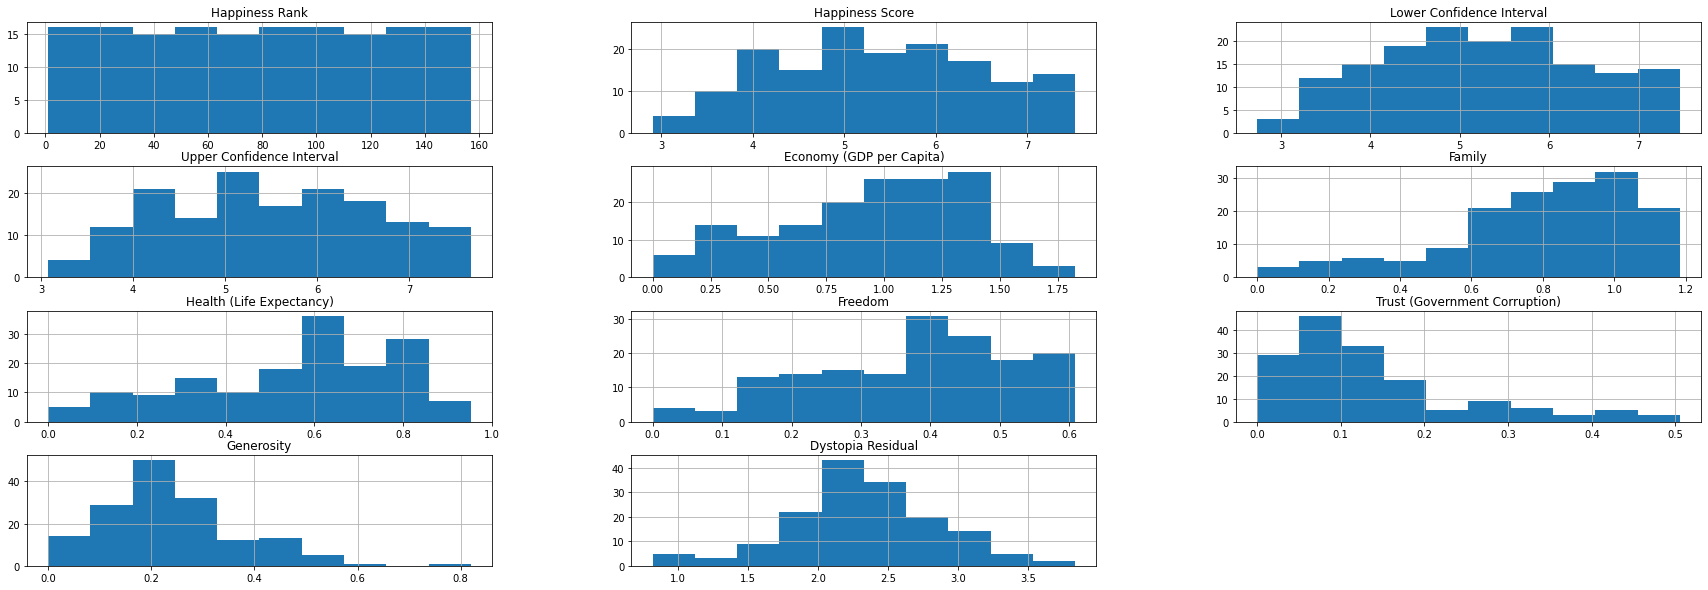

In [151]:
copy16.hist(figsize=(30,10));

In [152]:
# renaming columns
copy16.rename(columns={'Economy (GDP per Capita)': 'GDP', 'Happiness Score': 'Happiness', 'Health (Life Expectancy)':'Life Expectancy', 'Trust (Government Corruption)':'Corruption', 'Dystopia Residual':'Dystopia',}, inplace=True)
copy16

Country                           Region  ...  Generosity  Dystopia
0        Denmark                   Western Europe  ...     0.36171   2.73939
1    Switzerland                   Western Europe  ...     0.28083   2.69463
2        Iceland                   Western Europe  ...     0.47678   2.83137
3         Norway                   Western Europe  ...     0.37895   2.66465
4        Finland                   Western Europe  ...     0.25492   2.82596
..           ...                              ...  ...         ...       ...
152        Benin               Sub-Saharan Africa  ...     0.20180   2.10812
153  Afghanistan                    Southern Asia  ...     0.31268   2.14558
154         Togo               Sub-Saharan Africa  ...     0.17517   2.13540
155        Syria  Middle East and Northern Africa  ...     0.48397   0.81789
156      Burundi               Sub-Saharan Africa  ...     0.20290   2.10404

[157 rows x 13 columns]

## assigning categorical values

In [153]:
copy16['Happiness Ranking'] = copy16.apply(lambda row: assignHappiness(row['Happiness']), axis=1)
copy16[copy16['Happiness Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Lower Confidence Interval, Upper Confidence Interval, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking]
Index: []

In [154]:
copy16['Generosity Ranking'] = copy16.apply(lambda row: assignGenerosity(row['Generosity']), axis=1)
copy16[copy16['Generosity Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Lower Confidence Interval, Upper Confidence Interval, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking]
Index: []

In [155]:
copy16['Corruption Ranking'] = copy16.apply(lambda row: assignCorruption(row['Corruption']), axis=1)
copy16[copy16['Corruption Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Lower Confidence Interval, Upper Confidence Interval, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking]
Index: []

In [156]:
copy16['Freedom Ranking'] = copy16.apply(lambda row: assignFreedom(row['Freedom']), axis=1)
copy16[copy16['Freedom Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Lower Confidence Interval, Upper Confidence Interval, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking]
Index: []

In [157]:
copy16['GDP Ranking'] = copy16.apply(lambda row: assignGDP(row['GDP']), axis=1)
copy16[copy16['GDP Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Lower Confidence Interval, Upper Confidence Interval, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking]
Index: []

In [158]:
copy16['Life Expectancy Ranking'] = copy16.apply(lambda row: assignLifeExpectancy(row['Life Expectancy']), axis=1)
copy16[copy16['Life Expectancy Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Lower Confidence Interval, Upper Confidence Interval, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking, Life Expectancy Ranking]
Index: []

In [164]:
copy16.sort_values(by=['Freedom'])

Country  ... Life Expectancy Ranking
132        Sudan  ...                     Low
140       Angola  ...                     Low
156      Burundi  ...                     Low
98        Greece  ...                    High
155        Syria  ...                     Mid
..           ...  ...                     ...
9         Sweden  ...                    High
1    Switzerland  ...                    High
139     Cambodia  ...                     Low
3         Norway  ...                     Mid
48    Uzbekistan  ...                     Mid

[157 rows x 19 columns]

In [163]:
copy16.sort_values(by=['Happiness'])

Country  ... Life Expectancy Ranking
156      Burundi  ...                     Low
155        Syria  ...                     Mid
154         Togo  ...                     Low
153  Afghanistan  ...                     Low
152        Benin  ...                     Low
..           ...  ...                     ...
4        Finland  ...                    High
3         Norway  ...                     Mid
2        Iceland  ...                    High
1    Switzerland  ...                    High
0        Denmark  ...                     Mid

[157 rows x 19 columns]

In [162]:
copy16.sort_values(by=['GDP'])

Country  ... Life Expectancy Ranking
75            Somalia  ...                     Low
124  Congo (Kinshasa)  ...                     Low
156           Burundi  ...                     Low
131            Malawi  ...                     Low
149           Liberia  ...                     Low
..                ...  ...                     ...
3              Norway  ...                     Mid
40             Kuwait  ...                     Mid
21          Singapore  ...                    High
19         Luxembourg  ...                    High
35              Qatar  ...                     Mid

[157 rows x 19 columns]

In [161]:
copy16.sort_values(by=['Corruption'])

Country  ... Life Expectancy Ranking
86   Bosnia and Herzegovina  ...                     Mid
78                Indonesia  ...                     Low
128                Bulgaria  ...                     Mid
70                  Romania  ...                     Mid
42      Trinidad and Tobago  ...                     Mid
..                      ...  ...                     ...
7               New Zealand  ...                    High
0                   Denmark  ...                     Mid
21                Singapore  ...                    High
35                    Qatar  ...                     Mid
151                  Rwanda  ...                     Low

[157 rows x 19 columns]

In [160]:
copy16.sort_values(by=['Life Expectancy'])

Country              Region  ...  GDP Ranking  Life Expectancy Ranking
110  Sierra Leone  Sub-Saharan Africa  ...          Low                      Low
143          Chad  Sub-Saharan Africa  ...          Low                      Low
138   Ivory Coast  Sub-Saharan Africa  ...          Low                      Low
140        Angola  Sub-Saharan Africa  ...          Mid                      Low
102       Nigeria  Sub-Saharan Africa  ...          Mid                      Low
..            ...                 ...  ...          ...                      ...
36          Spain      Western Europe  ...         High                     High
57    South Korea        Eastern Asia  ...         High                     High
52          Japan        Eastern Asia  ...         High                     High
21      Singapore   Southeastern Asia  ...         High                     High
74      Hong Kong        Eastern Asia  ...         High                     High

[157 rows x 19 columns]

In [159]:
copy16.sort_values(by=['Generosity'])

Country  ... Life Expectancy Ranking
98              Greece  ...                    High
59           Lithuania  ...                     Mid
55              Russia  ...                     Mid
97             Tunisia  ...                     Mid
89             Morocco  ...                     Mid
..                 ...  ...                     ...
96   Somaliland Region  ...                     Low
29               Malta  ...                    High
78           Indonesia  ...                     Low
32            Thailand  ...                     Mid
118            Myanmar  ...                     Low

[157 rows x 19 columns]

# <h1><center> 2015 Data Analysis<center><h1>

In [165]:
Ranking15.head()

Country          Region  ...  Generosity  Dystopia Residual
0  Switzerland  Western Europe  ...     0.29678            2.51738
1      Iceland  Western Europe  ...     0.43630            2.70201
2      Denmark  Western Europe  ...     0.34139            2.49204
3       Norway  Western Europe  ...     0.34699            2.46531
4       Canada   North America  ...     0.45811            2.45176

[5 rows x 12 columns]

In [166]:
Ranking15.shape

(158, 12)

In [167]:
Ranking15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [168]:
Ranking15.isnull().values.any()

False

In [318]:
Ranking15.corr()

Happiness Rank  ...  Dystopia Residual
Happiness Rank                       1.000000  ...          -0.521999
Happiness Score                     -0.992105  ...           0.530474
Standard Error                       0.158516  ...           0.083981
Economy (GDP per Capita)            -0.785267  ...           0.040059
Family                              -0.733644  ...           0.148117
Health (Life Expectancy)            -0.735613  ...           0.018979
Freedom                             -0.556886  ...           0.062783
Trust (Government Corruption)       -0.372315  ...          -0.033105
Generosity                          -0.160142  ...          -0.101301
Dystopia Residual                   -0.521999  ...           1.000000

[10 rows x 10 columns]

In [169]:
Ranking15.describe()

Happiness Rank  Happiness Score  ...  Generosity  Dystopia Residual
count      158.000000       158.000000  ...  158.000000         158.000000
mean        79.493671         5.375734  ...    0.237296           2.098977
std         45.754363         1.145010  ...    0.126685           0.553550
min          1.000000         2.839000  ...    0.000000           0.328580
25%         40.250000         4.526000  ...    0.150553           1.759410
50%         79.500000         5.232500  ...    0.216130           2.095415
75%        118.750000         6.243750  ...    0.309883           2.462415
max        158.000000         7.587000  ...    0.795880           3.602140

[8 rows x 10 columns]

In [170]:
copy15 = Ranking15.copy()

In [171]:
copy15[copy15.isna().any(axis=1)]

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []

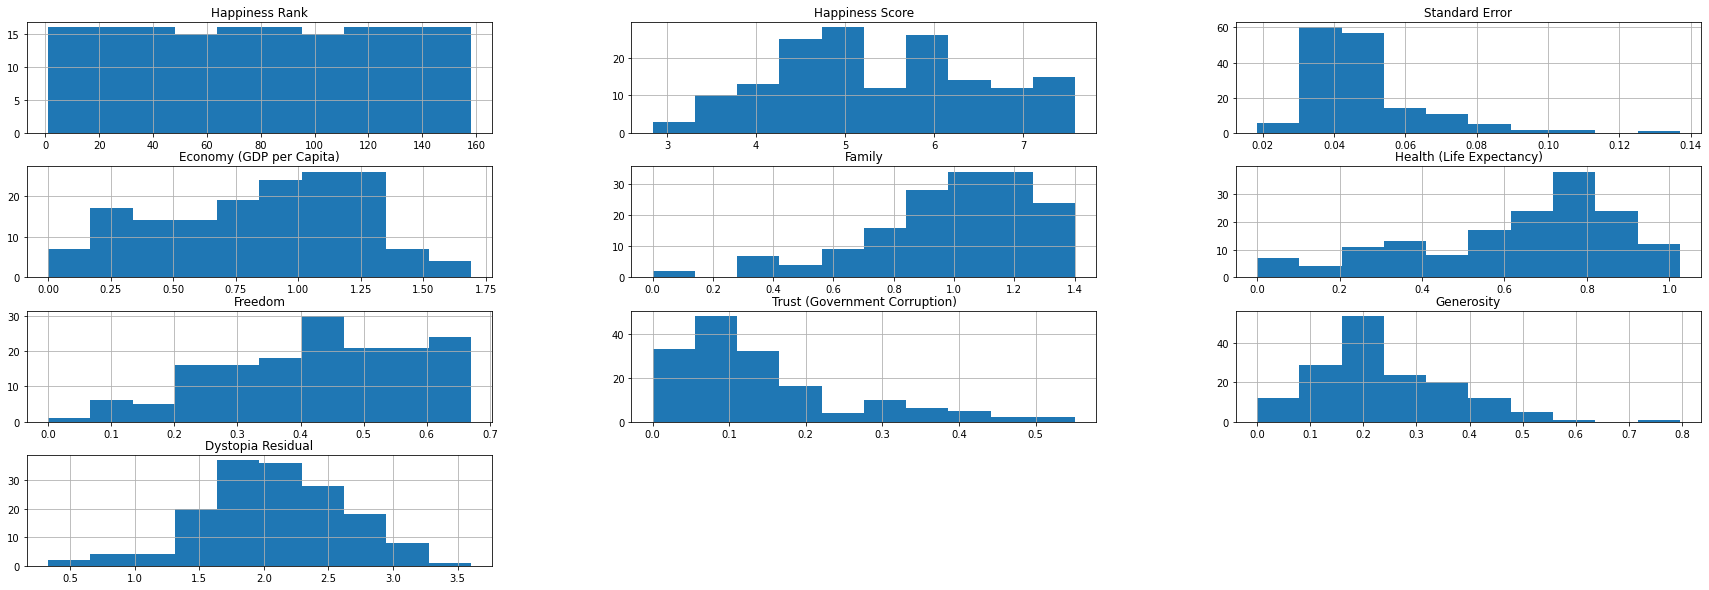

In [172]:
copy15.hist(figsize=(30,10));

In [173]:
# renaming columns
copy15.rename(columns={'Economy (GDP per Capita)': 'GDP', 'Happiness Score': 'Happiness', 'Health (Life Expectancy)':'Life Expectancy', 'Trust (Government Corruption)':'Corruption', 'Dystopia Residual':'Dystopia'}, inplace=True)
copy15

Country                           Region  ...  Generosity  Dystopia
0    Switzerland                   Western Europe  ...     0.29678   2.51738
1        Iceland                   Western Europe  ...     0.43630   2.70201
2        Denmark                   Western Europe  ...     0.34139   2.49204
3         Norway                   Western Europe  ...     0.34699   2.46531
4         Canada                    North America  ...     0.45811   2.45176
..           ...                              ...  ...         ...       ...
153       Rwanda               Sub-Saharan Africa  ...     0.22628   0.67042
154        Benin               Sub-Saharan Africa  ...     0.18260   1.63328
155        Syria  Middle East and Northern Africa  ...     0.47179   0.32858
156      Burundi               Sub-Saharan Africa  ...     0.19727   1.83302
157         Togo               Sub-Saharan Africa  ...     0.16681   1.56726

[158 rows x 12 columns]

## assingning categorical values

In [174]:
copy15['Happiness Ranking'] = copy15.apply(lambda row: assignHappiness(row['Happiness']), axis=1)
copy15[copy15['Happiness Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Standard Error, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking]
Index: []

In [175]:
copy15['Generosity Ranking'] = copy15.apply(lambda row: assignGenerosity(row['Generosity']), axis=1)
copy15[copy15['Generosity Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Standard Error, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking]
Index: []

In [176]:
copy15['Corruption Ranking'] = copy15.apply(lambda row: assignCorruption(row['Corruption']), axis=1)
copy15[copy15['Corruption Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Standard Error, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking]
Index: []

In [177]:
copy15['Freedom Ranking'] = copy15.apply(lambda row: assignFreedom(row['Freedom']), axis=1)
copy15[copy15['Freedom Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Standard Error, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking]
Index: []

In [178]:
copy15['GDP Ranking'] = copy15.apply(lambda row: assignGDP(row['GDP']), axis=1)
copy15[copy15['GDP Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Standard Error, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking]
Index: []

In [179]:
copy15['Life Expectancy Ranking'] = copy15.apply(lambda row: assignLifeExpectancy(row['Life Expectancy']), axis=1)
copy15[copy15['Life Expectancy Ranking'] == 'none']

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness, Standard Error, GDP, Family, Life Expectancy, Freedom, Corruption, Generosity, Dystopia, Happiness Ranking, Generosity Ranking, Corruption Ranking, Freedom Ranking, GDP Ranking, Life Expectancy Ranking]
Index: []

In [180]:
copy15

Country  ... Life Expectancy Ranking
0    Switzerland  ...                    High
1        Iceland  ...                    High
2        Denmark  ...                    High
3         Norway  ...                    High
4         Canada  ...                    High
..           ...  ...                     ...
153       Rwanda  ...                     Low
154        Benin  ...                     Low
155        Syria  ...                     Mid
156      Burundi  ...                     Low
157         Togo  ...                     Low

[158 rows x 18 columns]

In [187]:
copy15.sort_values(by=['Freedom'])

Country  ... Life Expectancy Ranking
111                    Iraq  ...                     Mid
101                  Greece  ...                    High
95   Bosnia and Herzegovina  ...                     Mid
117                   Sudan  ...                     Low
136                  Angola  ...                     Low
..                      ...  ...                     ...
43               Uzbekistan  ...                     Mid
7                    Sweden  ...                    High
144                Cambodia  ...                     Mid
0               Switzerland  ...                    High
3                    Norway  ...                    High

[158 rows x 18 columns]

In [186]:
copy15.sort_values(by=['Happiness'])

Country  ... Life Expectancy Ranking
157         Togo  ...                     Low
156      Burundi  ...                     Low
155        Syria  ...                     Mid
154        Benin  ...                     Low
153       Rwanda  ...                     Low
..           ...  ...                     ...
4         Canada  ...                    High
3         Norway  ...                    High
2        Denmark  ...                    High
1        Iceland  ...                    High
0    Switzerland  ...                    High

[158 rows x 18 columns]

In [185]:
copy15.sort_values(by=['GDP'])

Country  ... Life Expectancy Ranking
119  Congo (Kinshasa)  ...                     Low
156           Burundi  ...                     Low
130            Malawi  ...                     Low
143             Niger  ...                     Low
115           Liberia  ...                     Low
..                ...  ...                     ...
3              Norway  ...                    High
23          Singapore  ...                    High
38             Kuwait  ...                     Mid
16         Luxembourg  ...                    High
27              Qatar  ...                     Mid

[158 rows x 18 columns]

In [184]:
copy15.sort_values(by=['Family'])

Country  ... Life Expectancy Ranking
147  Central African Republic  ...                     Low
157                      Togo  ...                     Low
152               Afghanistan  ...                     Low
154                     Benin  ...                     Low
116                     India  ...                     Mid
..                        ...  ...                     ...
43                 Uzbekistan  ...                     Mid
0                 Switzerland  ...                    High
2                     Denmark  ...                    High
17                    Ireland  ...                    High
1                     Iceland  ...                    High

[158 rows x 18 columns]

In [183]:
copy15.sort_values(by=['Generosity'])

Country  ... Life Expectancy Ranking
101          Greece  ...                    High
63           Russia  ...                     Mid
55        Lithuania  ...                     Mid
61          Croatia  ...                     Mid
129         Georgia  ...                     Mid
..              ...  ...                     ...
73        Indonesia  ...                     Mid
36            Malta  ...                    High
20   United Kingdom  ...                    High
33         Thailand  ...                     Mid
128         Myanmar  ...                     Low

[158 rows x 18 columns]

In [182]:
copy15.sort_values(by=['Corruption'])

Country  ... Life Expectancy Ranking
73                Indonesia  ...                     Mid
95   Bosnia and Herzegovina  ...                     Mid
85                  Romania  ...                     Mid
133                Bulgaria  ...                     Mid
55                Lithuania  ...                     Mid
..                      ...  ...                     ...
7                    Sweden  ...                    High
2                   Denmark  ...                    High
23                Singapore  ...                    High
27                    Qatar  ...                     Mid
153                  Rwanda  ...                     Low

[158 rows x 18 columns]

In [181]:
copy15.sort_values(by=['Life Expectancy'])

Country  ... Life Expectancy Ranking
122              Sierra Leone  ...                     Low
127                  Botswana  ...                     Low
147  Central African Republic  ...                     Low
100                 Swaziland  ...                     Low
96                    Lesotho  ...                     Low
..                        ...  ...                     ...
35                      Spain  ...                    High
46                South Korea  ...                    High
45                      Japan  ...                    High
71                  Hong Kong  ...                    High
23                  Singapore  ...                    High

[158 rows x 18 columns]

# Year analysis

## Canada Timeseries

In [188]:
# filtering yearly data only for canada
canada15 = copy15[copy15.Country == 'Canada']
canada16 = copy16[copy16.Country == 'Canada']
canada17 = copy17[copy17.Country == 'Canada']
canada18 = copy18[copy18.Country == 'Canada']
canada19 = copy19[copy19.Country == 'Canada']
canada15 = canada15[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']]
canada16 = canada16[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']]
canada17 = canada17[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']]
canada18 = canada18[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']]
canada19 = canada19[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']]

In [190]:
# merging all of canada data into 1 dataframe and creting a year column
years = [2015, 2016, 2017, 2018, 2019]
merged = canada15.append(canada16)
merged = merged.append(canada17)
merged = merged.append(canada18)
merged = merged.append(canada19)
merged['Years'] = years
merged

Country         Region  Happiness  ...  Corruption  Generosity  Years
4  Canada  North America      7.427  ...    0.329570     0.45811   2015
5  Canada  North America      7.404  ...    0.313290     0.44834   2016
6  Canada  North America      7.316  ...    0.287372     0.43554   2017
6  Canada  North America      7.328  ...    0.291000     0.32100   2018
8  Canada  North America      7.278  ...    0.308000     0.28500   2019

[5 rows x 8 columns]

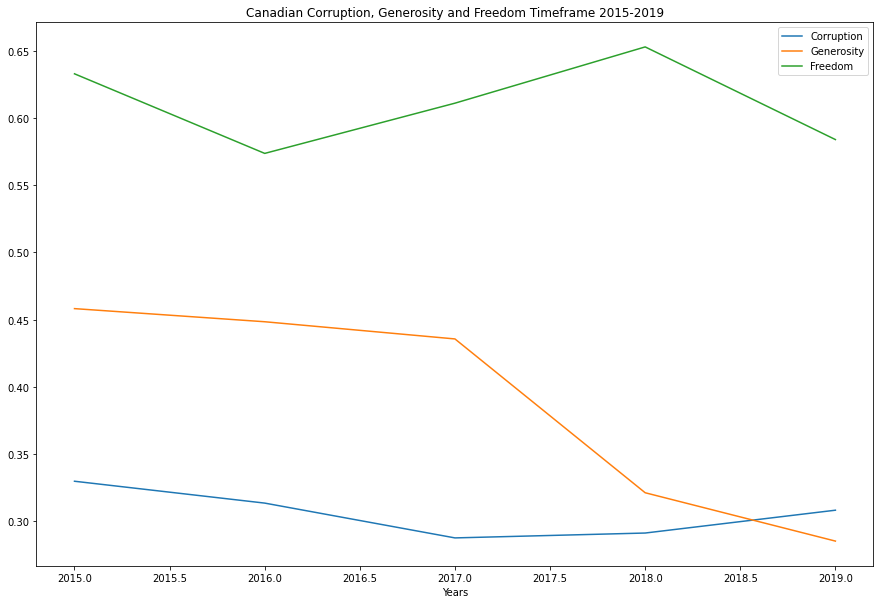

In [202]:
merged.plot(x='Years', y=['Corruption', 'Generosity', 'Freedom'], figsize=(15,10));
plt.title('Canadian Corruption, Generosity and Freedom Timeframe 2015-2019');

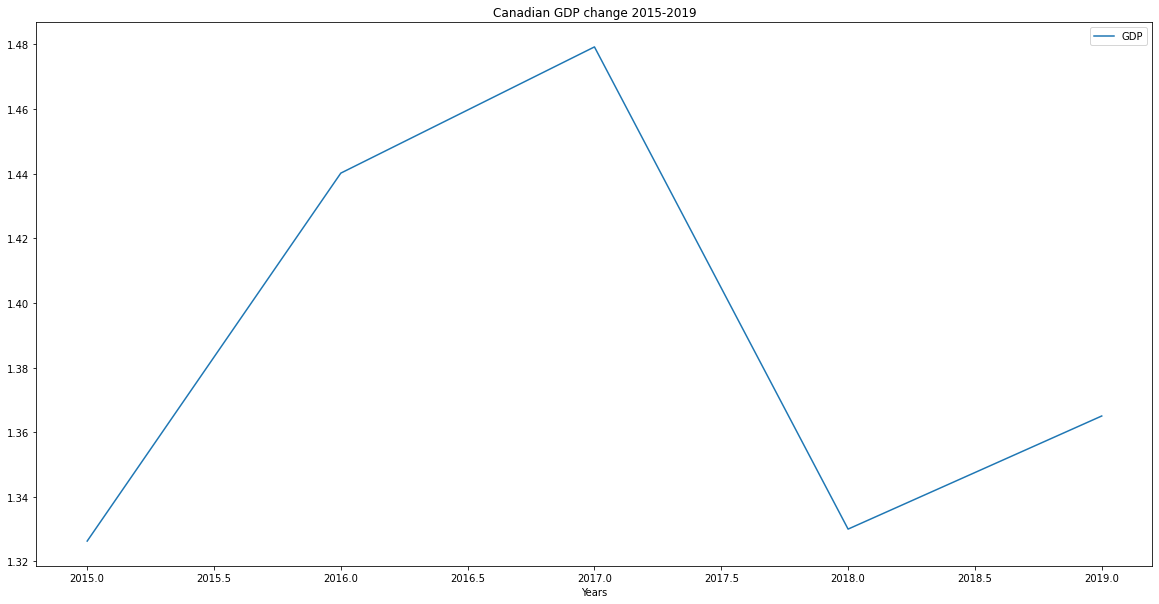

In [213]:
merged.plot.line(x='Years', y=['GDP'], figsize=(20,10));
plt.title('Canadian GDP change 2015-2019');

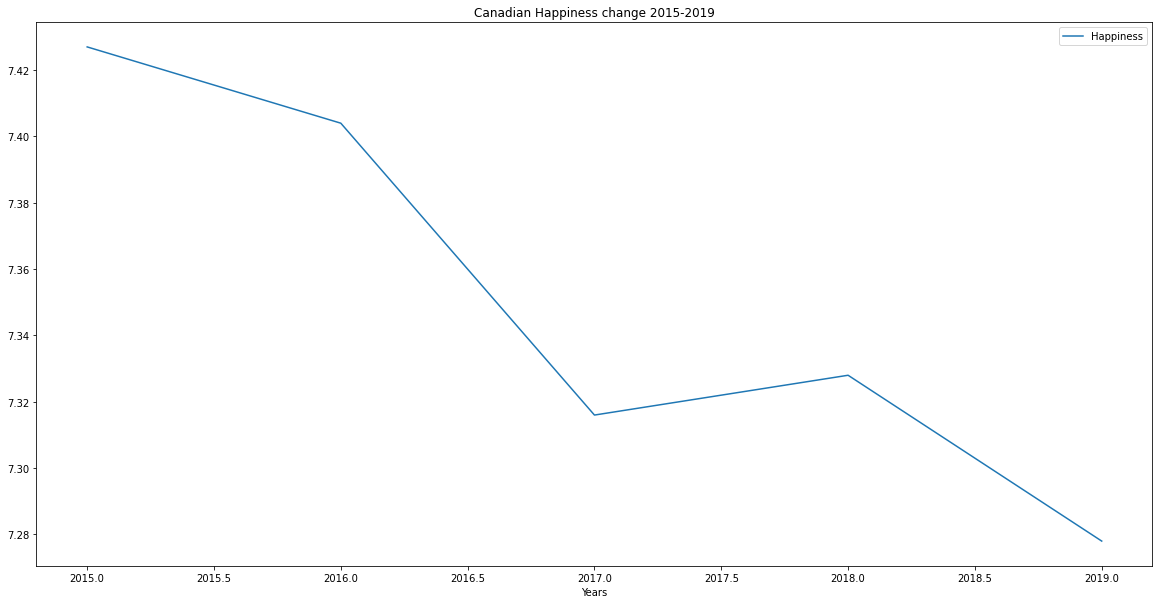

In [212]:
merged.plot.line(x='Years', y=['Happiness'], figsize=(20,10));
plt.title('Canadian Happiness change 2015-2019');

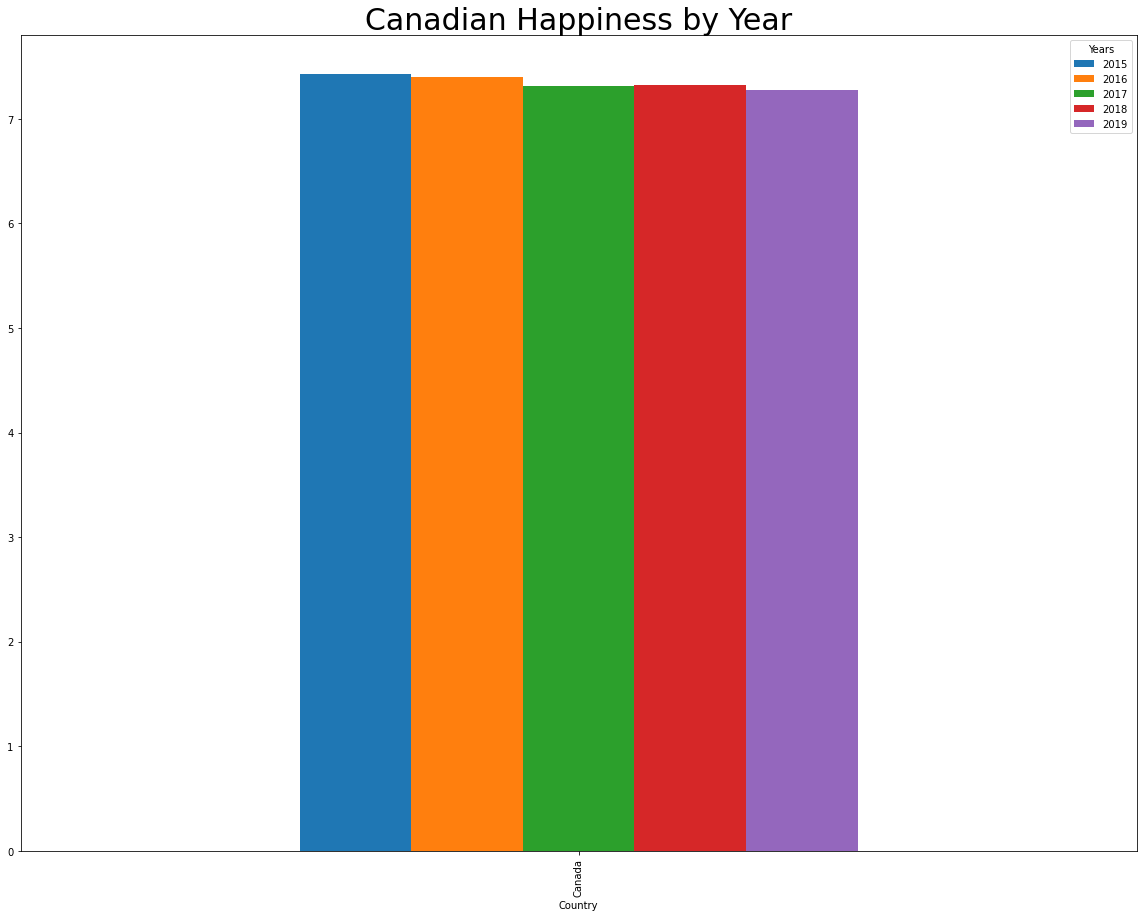

In [169]:
pd.crosstab(index= merged['Country'],
            columns= merged['Years'],
            values= merged['Happiness'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(20,15))
plt.title('Canadian Happiness by Year', fontsize=30);

## Regional Timeseries

In [215]:
regional15 = copy15[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']].copy()
regional16 = copy16[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']].copy()
regional17 = copy17[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']].copy()
regional18 = copy18[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']].copy()
regional19 = copy19[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity']].copy()

In [223]:
regional15 = regional15.groupby(['Region']).mean()
regional15['Year'] = 2015
regional15

Happiness       GDP  ...  Generosity  Year
Region                                                ...                  
Australia and New Zealand         7.285000  1.291880  ...    0.455315  2015
Central and Eastern Europe        5.332931  0.942438  ...    0.152264  2015
Eastern Asia                      5.626167  1.151780  ...    0.225885  2015
Latin America and Caribbean       6.144682  0.876815  ...    0.217788  2015
Middle East and Northern Africa   5.406900  1.066973  ...    0.190375  2015
North America                     7.273000  1.360400  ...    0.429580  2015
Southeastern Asia                 5.317444  0.789054  ...    0.419261  2015
Southern Asia                     4.580857  0.560486  ...    0.341429  2015
Sub-Saharan Africa                4.202800  0.380473  ...    0.221137  2015
Western Europe                    6.689619  1.298596  ...    0.302109  2015

[10 rows x 6 columns]

In [225]:
regional16 = regional16.groupby(['Region']).mean()
regional16['Year'] = 2016
regional16

Happiness       GDP  ...  Generosity  Year
Region                                                ...                  
Australia and New Zealand         7.323500  1.402545  ...    0.484040  2016
Central and Eastern Europe        5.370690  1.047537  ...    0.170898  2016
Eastern Asia                      5.624167  1.277312  ...    0.223563  2016
Latin America and Caribbean       6.101750  0.993410  ...    0.208428  2016
Middle East and Northern Africa   5.386053  1.139323  ...    0.186749  2016
North America                     7.254000  1.474055  ...    0.429555  2016
Southeastern Asia                 5.338889  0.896381  ...    0.446150  2016
Southern Asia                     4.563286  0.660671  ...    0.343281  2016
Sub-Saharan Africa                4.136421  0.474321  ...    0.226348  2016
Western Europe                    6.685667  1.417056  ...    0.304715  2016

[10 rows x 6 columns]

In [226]:
regional17 = regional17.groupby(['Region']).mean()
regional17['Year'] = 2017
regional17

Happiness       GDP  ...  Generosity  Year
Region                                                ...                  
Australia and New Zealand         7.299000  1.445060  ...    0.488852  2017
Central and Eastern Europe        5.409931  1.092051  ...    0.186116  2017
Eastern Asia                      5.646667  1.318716  ...    0.221224  2017
Latin America and Caribbean       5.957818  1.006981  ...    0.210696  2017
Middle East and Northern Africa   5.369684  1.168535  ...    0.199172  2017
North America                     7.154500  1.512732  ...    0.414059  2017
Southeastern Asia                 5.444875  0.965253  ...    0.449860  2017
Southern Asia                     4.628429  0.697479  ...    0.341446  2017
Sub-Saharan Africa                4.111949  0.501749  ...    0.229599  2017
Western Europe                    6.703714  1.457411  ...    0.303497  2017

[10 rows x 6 columns]

In [227]:
regional18 = regional18.groupby(['Region']).mean()
regional18['Year'] = 2018
regional18

Happiness       GDP  ...  Generosity  Year
Region                                                ...                  
Australia and New Zealand         7.298000  1.304000  ...    0.363000  2018
Central and Eastern Europe        5.463966  0.989345  ...    0.133000  2018
Eastern Asia                      5.672000  1.205500  ...    0.155500  2018
Latin America and Caribbean       5.950136  0.901318  ...    0.141409  2018
Middle East and Northern Africa   5.310350  1.088550  ...    0.161850  2018
North America                     7.107000  1.364000  ...    0.306000  2018
Southeastern Asia                 5.313444  0.894000  ...    0.311222  2018
Southern Asia                     4.603857  0.625143  ...    0.243571  2018
Sub-Saharan Africa                4.195026  0.442846  ...    0.173795  2018
Western Europe                    6.829100  1.325650  ...    0.223850  2018

[10 rows x 6 columns]

In [228]:
regional19 = regional19.groupby(['Region']).mean()
regional19['Year'] = 2019
regional19

Happiness       GDP  ...  Generosity  Year
Region                                                ...                  
Australia and New Zealand         7.267500  1.337500  ...    0.331000  2019
Central and Eastern Europe        5.561517  1.021069  ...    0.142724  2019
Eastern Asia                      5.688833  1.235167  ...    0.172833  2019
Latin America and Caribbean       5.954429  0.924286  ...    0.144619  2019
Middle East and Northern Africa   5.261050  1.069250  ...    0.155350  2019
North America                     7.085000  1.399000  ...    0.282500  2019
Southeastern Asia                 5.273667  0.930000  ...    0.301778  2019
Southern Asia                     4.526857  0.650286  ...    0.234714  2019
Sub-Saharan Africa                4.300050  0.443750  ...    0.187725  2019
Western Europe                    6.898400  1.362050  ...    0.221050  2019

[10 rows x 6 columns]

In [260]:
# merging all of canada data into 1 dataframe and creting a year column
mergedRegional = regional15.append(regional16)
mergedRegional = mergedRegional.append(regional17)
mergedRegional = mergedRegional.append(regional18)
mergedRegional = mergedRegional.append(regional19)
mergedRegional

Happiness       GDP  ...  Generosity  Year
Region                                                ...                  
Australia and New Zealand         7.285000  1.291880  ...    0.455315  2015
Central and Eastern Europe        5.332931  0.942438  ...    0.152264  2015
Eastern Asia                      5.626167  1.151780  ...    0.225885  2015
Latin America and Caribbean       6.144682  0.876815  ...    0.217788  2015
Middle East and Northern Africa   5.406900  1.066973  ...    0.190375  2015
North America                     7.273000  1.360400  ...    0.429580  2015
Southeastern Asia                 5.317444  0.789054  ...    0.419261  2015
Southern Asia                     4.580857  0.560486  ...    0.341429  2015
Sub-Saharan Africa                4.202800  0.380473  ...    0.221137  2015
Western Europe                    6.689619  1.298596  ...    0.302109  2015
Australia and New Zealand         7.323500  1.402545  ...    0.484040  2016
Central and Eastern Europe        5.370690  1.047537  ...    0.170898  2016
Eastern Asia                      5.624167  1.277312  ...    0.223563  2016
Latin America and Caribbean       6.101750  0.993410  ...    0.208428  2016
Middle East and Northern Africa   5.386053  1.139323  ...    0.186749  2016
North America                     7.254000  1.474055  ...    0.429555  2016
Southeastern Asia                 5.338889  0.896381  ...    0.446150  2016
Southern Asia                     4.563286  0.660671  ...    0.343281  2016
Sub-Saharan Africa                4.136421  0.474321  ...    0.226348  2016
Western Europe                    6.685667  1.417056  ...    0.304715  2016
Australia and New Zealand         7.299000  1.445060  ...    0.488852  2017
Central and Eastern Europe        5.409931  1.092051  ...    0.186116  2017
Eastern Asia                      5.646667  1.318716  ...    0.221224  2017
Latin America and Caribbean       5.957818  1.006981  ...    0.210696  2017
Middle East and Northern Africa   5.369684  1.168535  ...    0.199172  2017
North America                     7.154500  1.512732  ...    0.414059  2017
Southeastern Asia                 5.444875  0.965253  ...    0.449860  2017
Southern Asia                     4.628429  0.697479  ...    0.341446  2017
Sub-Saharan Africa                4.111949  0.501749  ...    0.229599  2017
Western Europe                    6.703714  1.457411  ...    0.303497  2017
Australia and New Zealand         7.298000  1.304000  ...    0.363000  2018
Central and Eastern Europe        5.463966  0.989345  ...    0.133000  2018
Eastern Asia                      5.672000  1.205500  ...    0.155500  2018
Latin America and Caribbean       5.950136  0.901318  ...    0.141409  2018
Middle East and Northern Africa   5.310350  1.088550  ...    0.161850  2018
North America                     7.107000  1.364000  ...    0.306000  2018
Southeastern Asia                 5.313444  0.894000  ...    0.311222  2018
Southern Asia                     4.603857  0.625143  ...    0.243571  2018
Sub-Saharan Africa                4.195026  0.442846  ...    0.173795  2018
Western Europe                    6.829100  1.325650  ...    0.223850  2018
Australia and New Zealand         7.267500  1.337500  ...    0.331000  2019
Central and Eastern Europe        5.561517  1.021069  ...    0.142724  2019
Eastern Asia                      5.688833  1.235167  ...    0.172833  2019
Latin America and Caribbean       5.954429  0.924286  ...    0.144619  2019
Middle East and Northern Africa   5.261050  1.069250  ...    0.155350  2019
North America                     7.085000  1.399000  ...    0.282500  2019
Southeastern Asia                 5.273667  0.930000  ...    0.301778  2019
Southern Asia                     4.526857  0.650286  ...    0.234714  2019
Sub-Saharan Africa                4.300050  0.443750  ...    0.187725  2019
Western Europe                    6.898400  1.362050  ...    0.221050  2019

[50 rows x 6 columns]

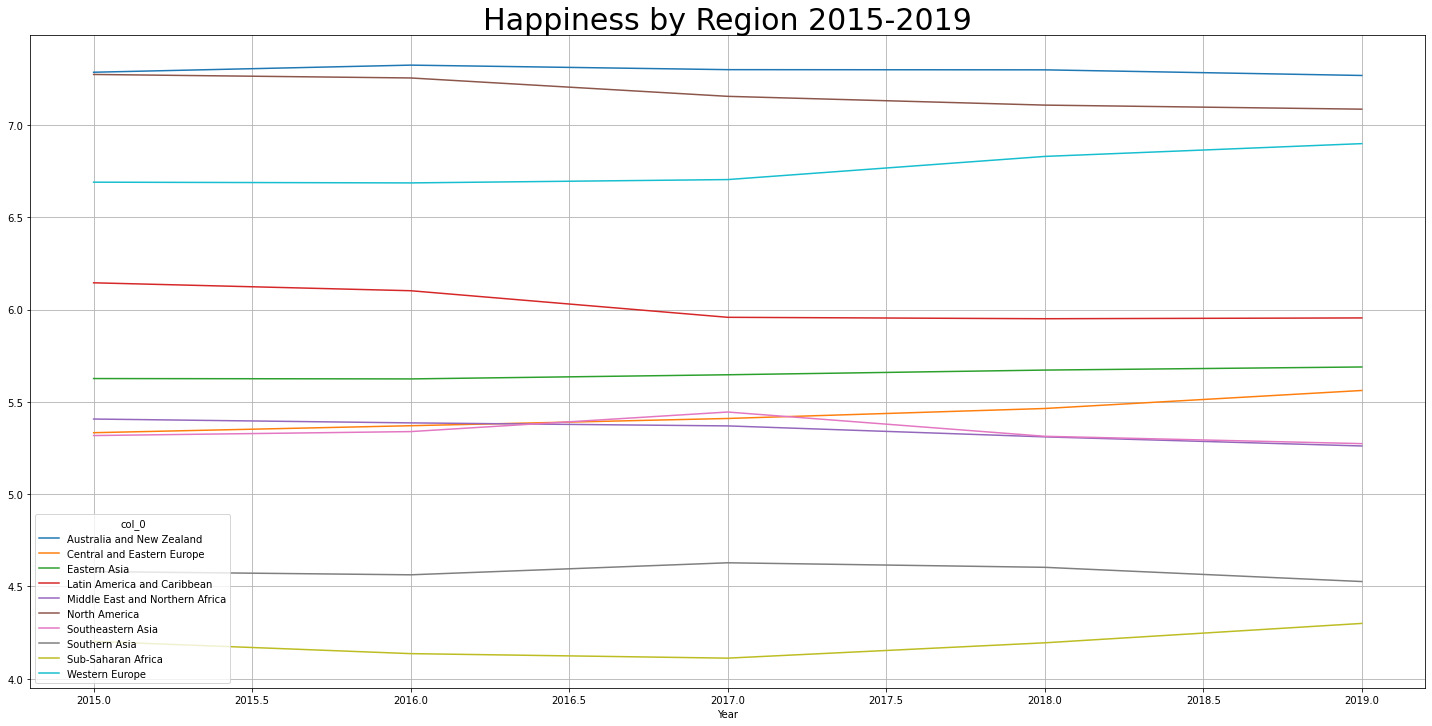

In [272]:
pd.crosstab(index= mergedRegional['Year'],
            columns= mergedRegional.index,
            values= mergedRegional['Happiness'], 
            aggfunc = 'mean').plot(kind='line', figsize=(25,12), grid=True)
plt.title('Happiness by Region 2015-2019', fontsize=30);

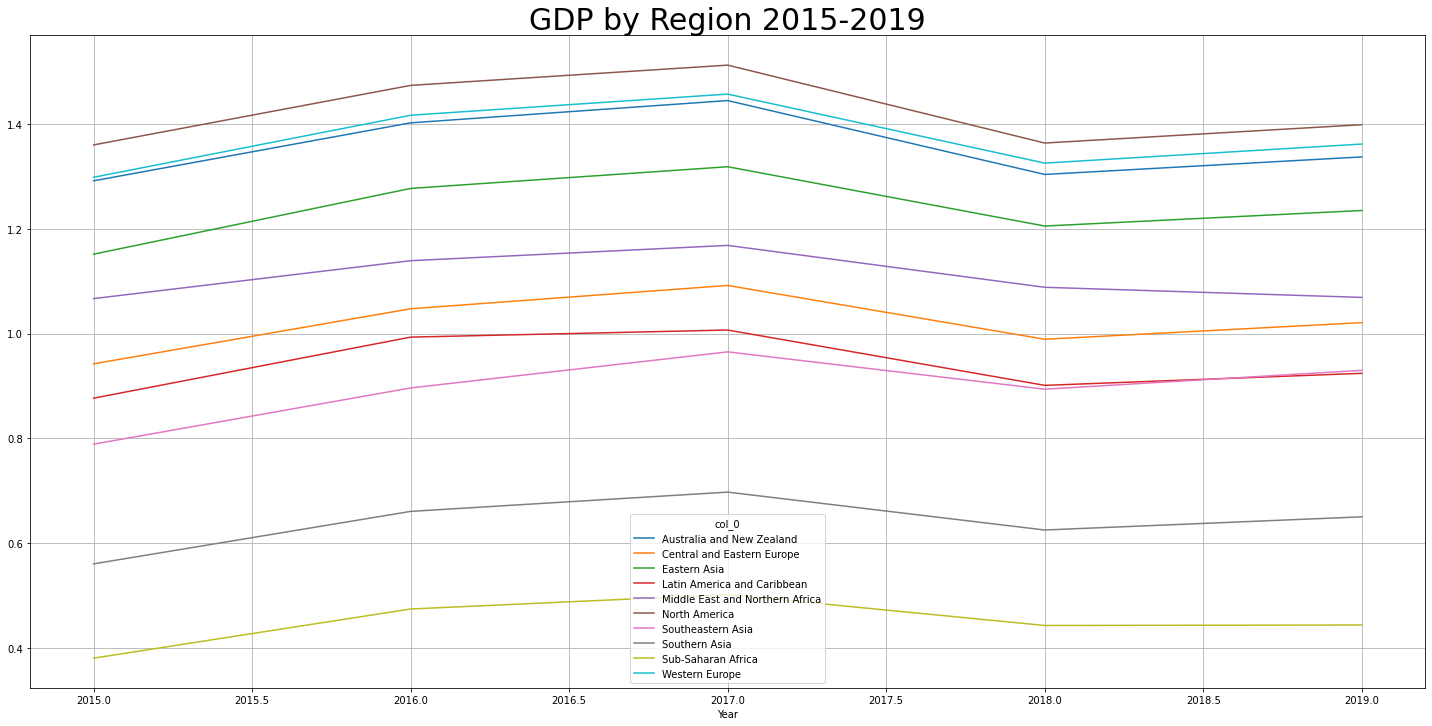

In [273]:
pd.crosstab(index= mergedRegional['Year'],
            columns= mergedRegional.index,
            values= mergedRegional['GDP'], 
            aggfunc = 'mean').plot(kind='line', figsize=(25,12), grid=True)
plt.title('GDP by Region 2015-2019', fontsize=30);

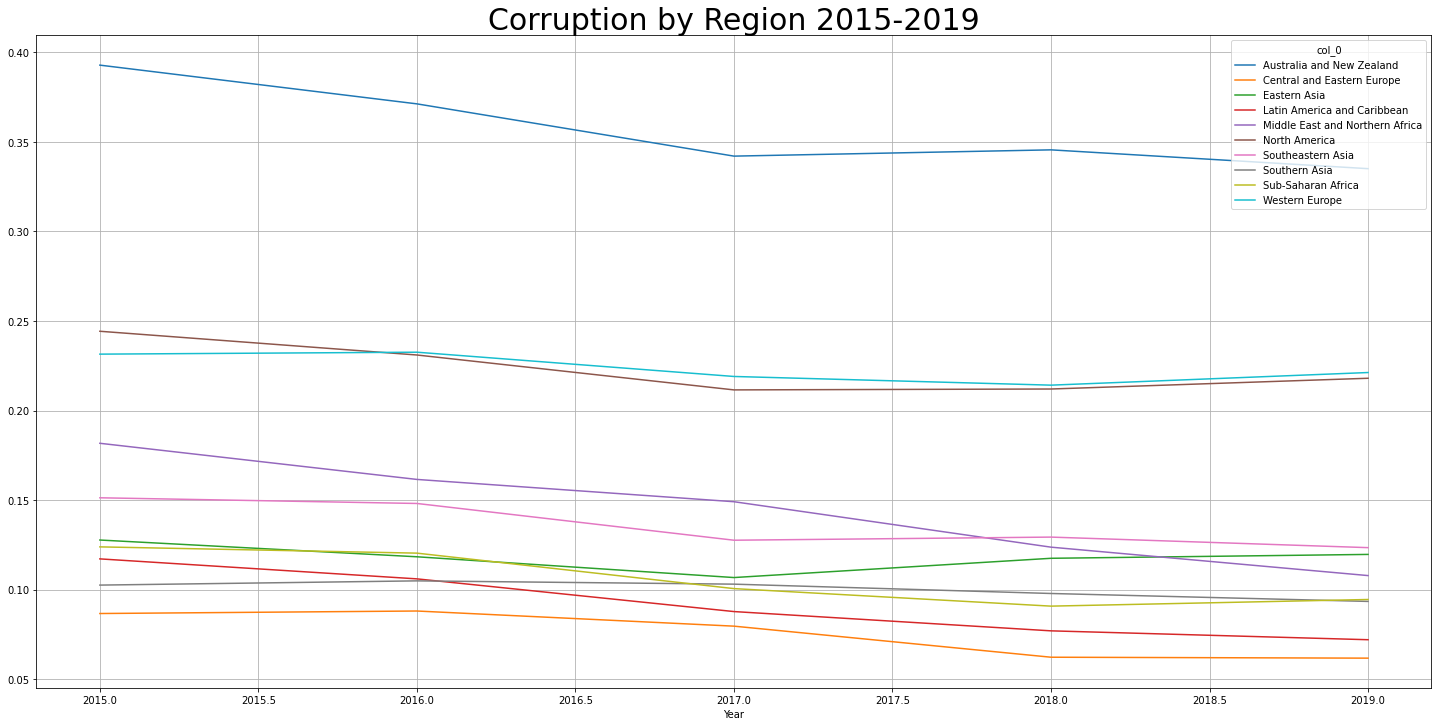

In [274]:
pd.crosstab(index= mergedRegional['Year'],
            columns= mergedRegional.index,
            values= mergedRegional['Corruption'], 
            aggfunc = 'mean').plot(kind='line', figsize=(25,12), grid=True)
plt.title('Corruption by Region 2015-2019', fontsize=30);

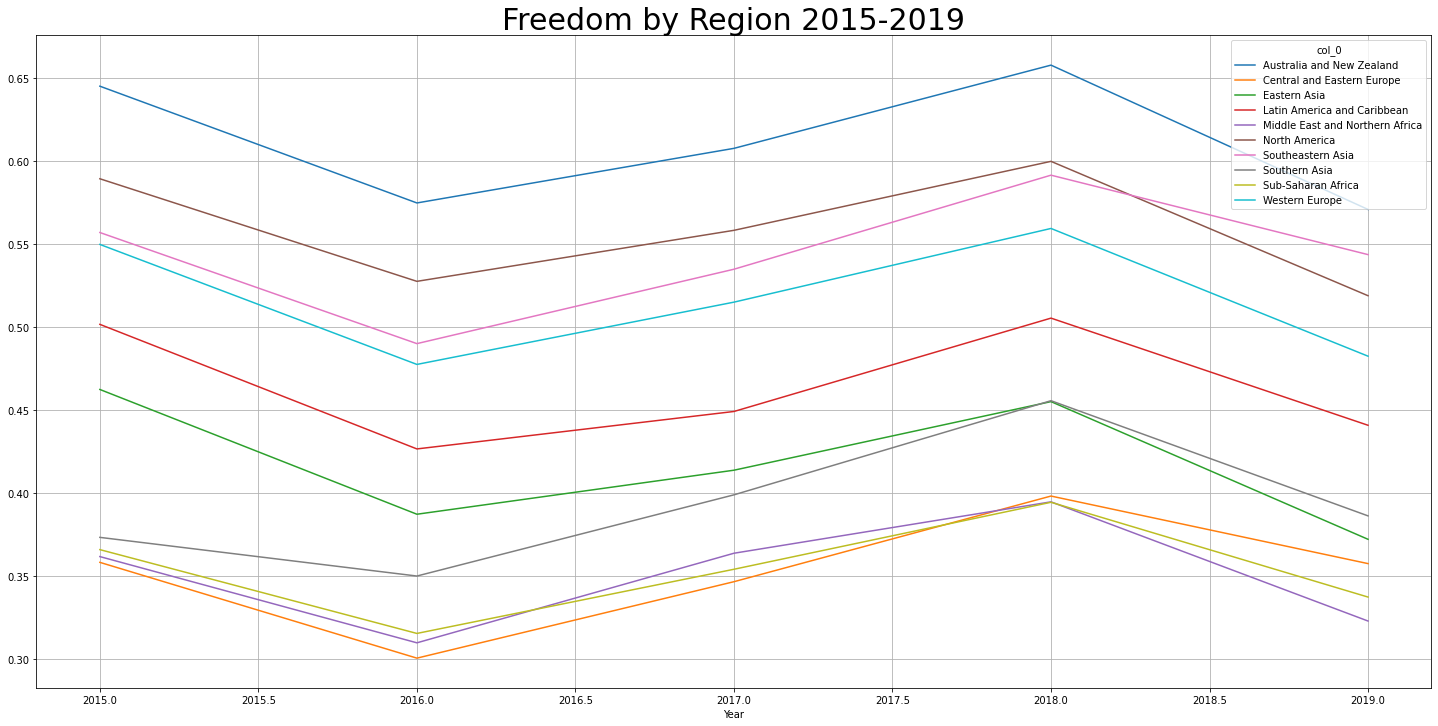

In [276]:
pd.crosstab(index= mergedRegional['Year'],
            columns= mergedRegional.index,
            values= mergedRegional['Freedom'], 
            aggfunc = 'mean').plot(kind='line', figsize=(25,12), grid=True)
plt.title('Freedom by Region 2015-2019', fontsize=30);

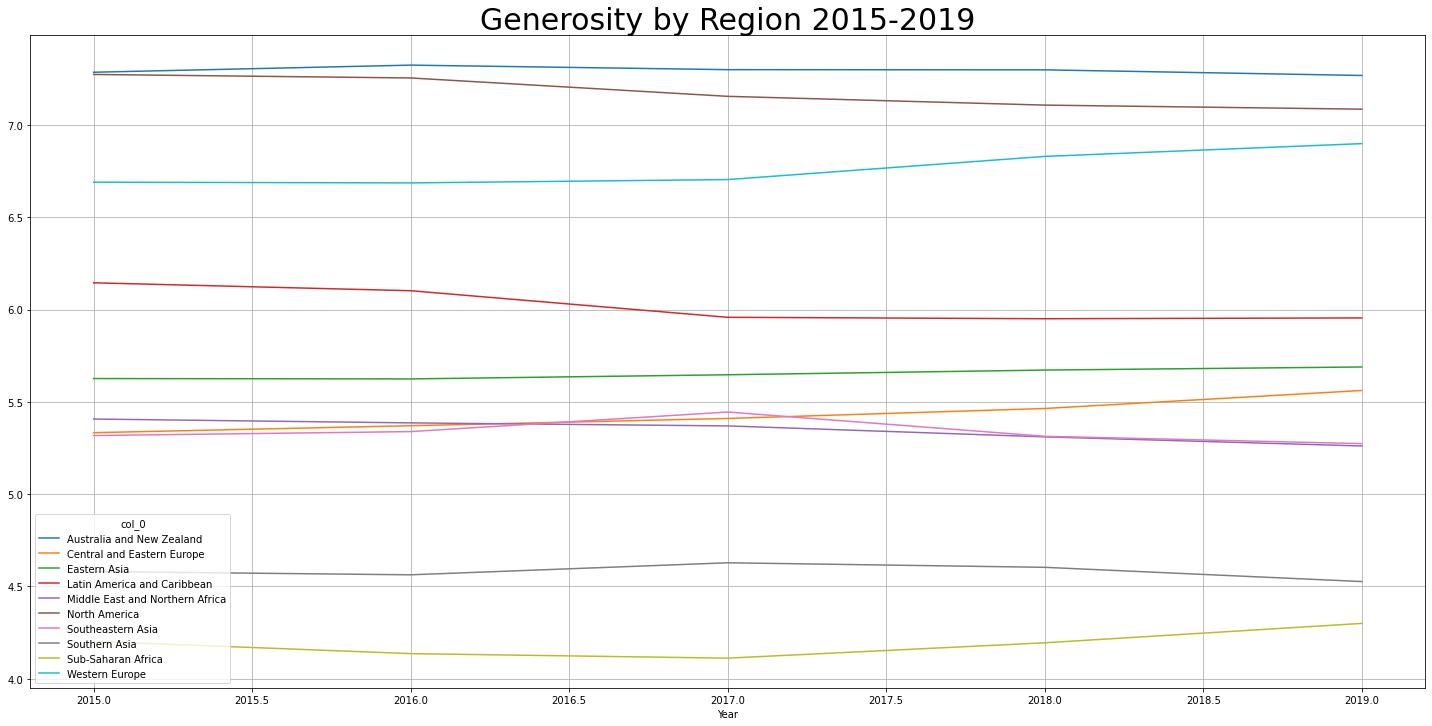

In [277]:
pd.crosstab(index= mergedRegional['Year'],
            columns= mergedRegional.index,
            values= mergedRegional['Happiness'], 
            aggfunc = 'mean').plot(kind='line', figsize=(25,12), grid=True)
plt.title('Generosity by Region 2015-2019', fontsize=30);

## Worldwide Timeseries

In [282]:
# merging all year datarmes together
copy15['Year'] = 2015
copy16['Year'] = 2016
copy17['Year'] = 2017
copy18['Year'] = 2018
copy19['Year'] = 2019
mergedDF = copy19[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity', 'Year']].append(copy18[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity', 'Year']])
mergedDF = mergedDF.append(copy17[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity', 'Year']])
mergedDF = mergedDF.append(copy16[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity', 'Year']])
mergedDF = mergedDF.append(copy15[['Country','Region', 'Happiness', 'GDP', 'Freedom', 'Corruption', 'Generosity', 'Year']])
mergedDF

Country                           Region  ...  Generosity  Year
0        Finland                   Western Europe  ...     0.15300  2019
1        Denmark                   Western Europe  ...     0.25200  2019
2         Norway                   Western Europe  ...     0.27100  2019
3        Iceland                   Western Europe  ...     0.35400  2019
4    Netherlands                   Western Europe  ...     0.32200  2019
..           ...                              ...  ...         ...   ...
153       Rwanda               Sub-Saharan Africa  ...     0.22628  2015
154        Benin               Sub-Saharan Africa  ...     0.18260  2015
155        Syria  Middle East and Northern Africa  ...     0.47179  2015
156      Burundi               Sub-Saharan Africa  ...     0.19727  2015
157         Togo               Sub-Saharan Africa  ...     0.16681  2015

[782 rows x 8 columns]

In [290]:
mergedDF.groupby('Year').mean()

Happiness       GDP   Freedom  Corruption  Generosity
Year                                                       
2015   5.375734  0.846137  0.428615    0.143422    0.237296
2016   5.382185  0.953880  0.370994    0.137624    0.242635
2017   5.354019  0.984718  0.408786    0.123120    0.246883
2018   5.375917  0.891449  0.454506    0.111970    0.181006
2019   5.407096  0.905147  0.392571    0.110603    0.184846

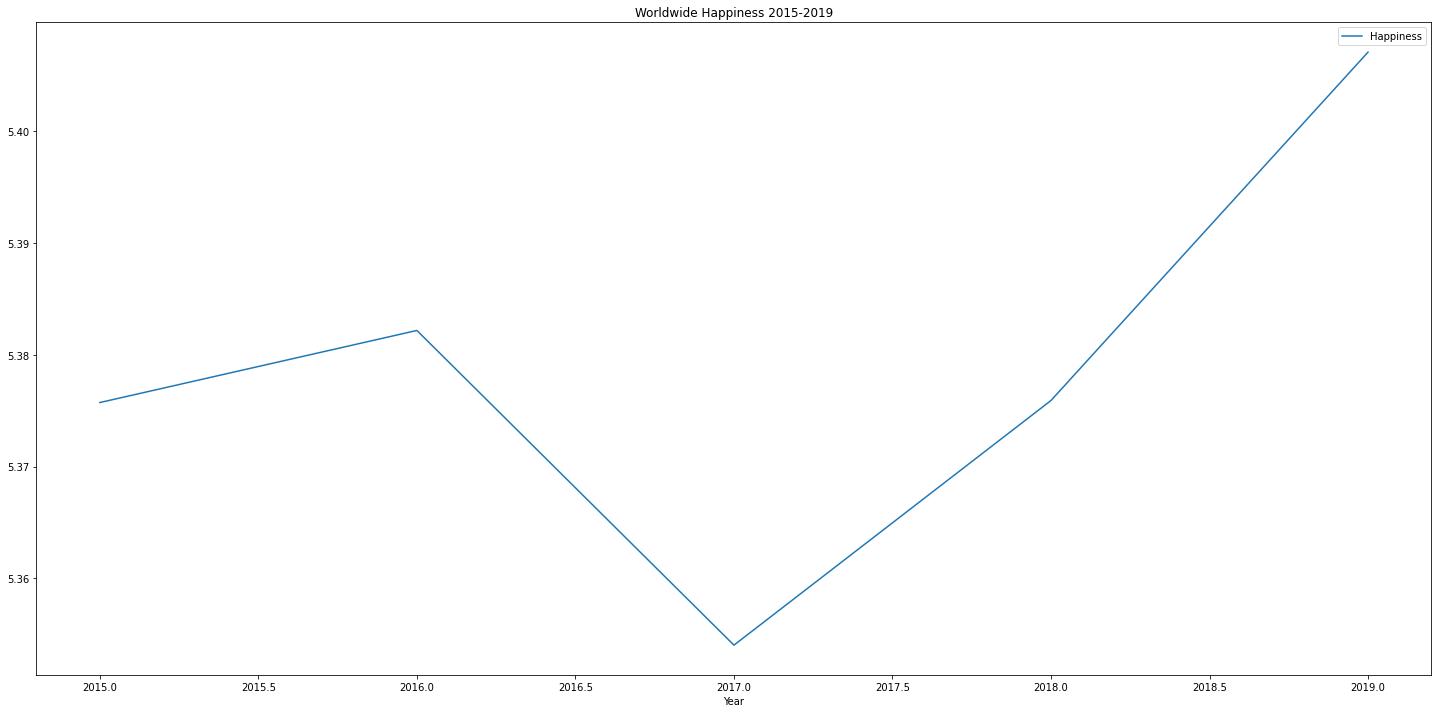

In [309]:
mergedDF.groupby('Year').mean().plot.line(y='Happiness', figsize=(25,12));
plt.title('Worldwide Happiness 2015-2019');

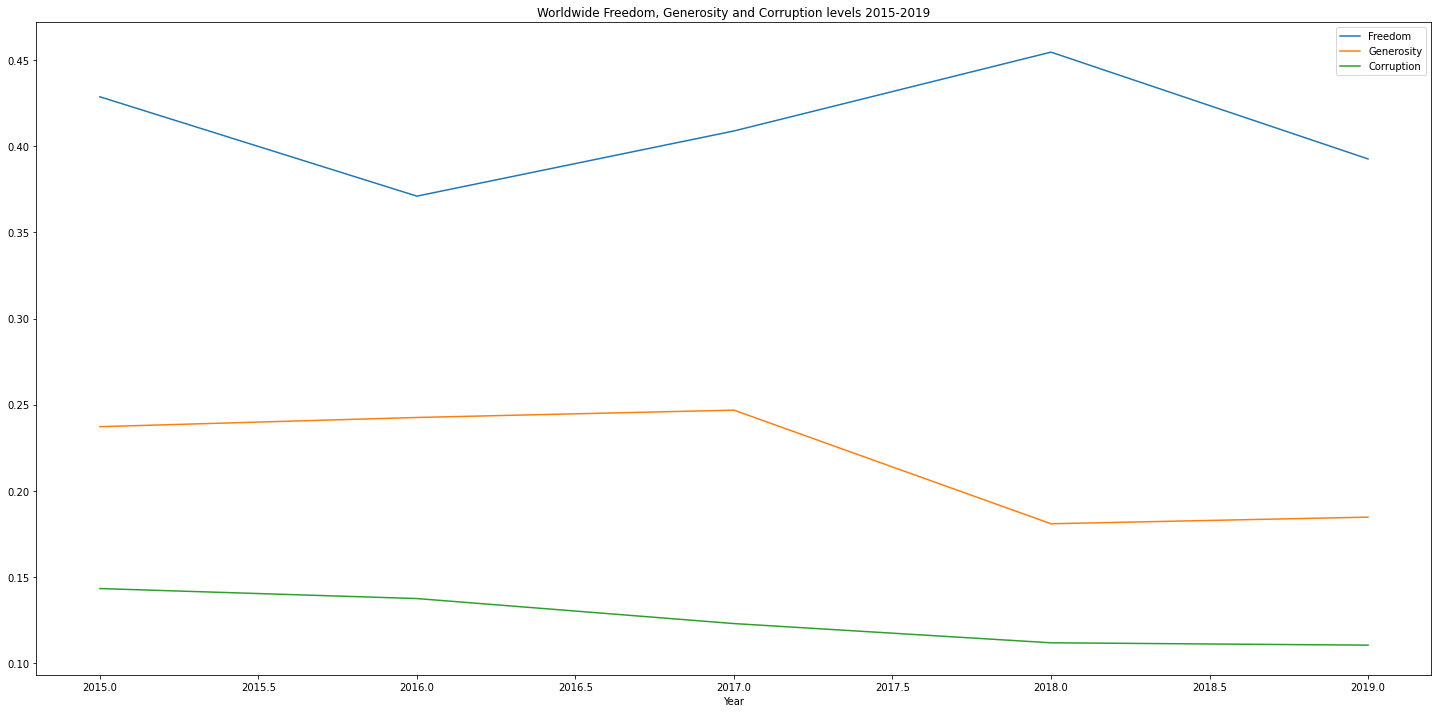

In [312]:
mergedDF.groupby('Year').mean().plot.line(y=['Freedom', 'Generosity','' 'Corruption'], figsize=(25,12));
plt.title('Worldwide Freedom, Generosity and Corruption levels 2015-2019');

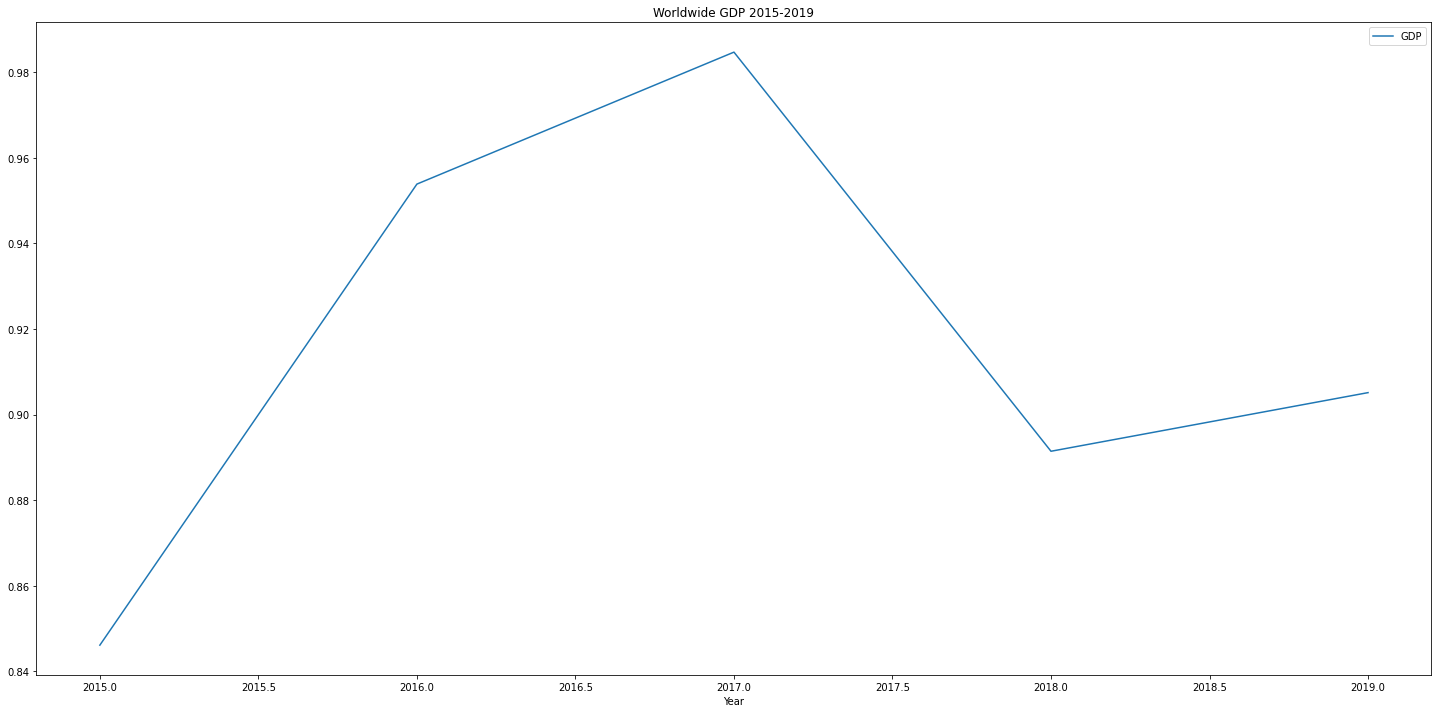

In [314]:
mergedDF.groupby('Year').mean().plot.line(y=['GDP'], figsize=(25,12));
plt.title('Worldwide GDP 2015-2019');

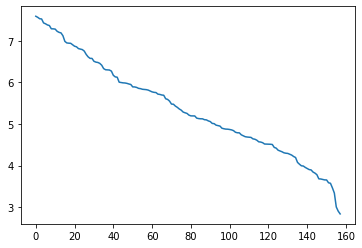

In [91]:
plt.plot(copy15.Happiness, label="2015")

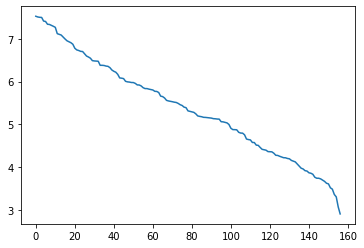

In [93]:
plt.plot(copy16.Happiness, label="2016")

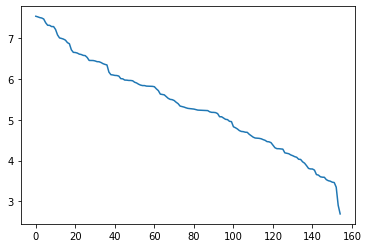

In [94]:
plt.plot(copy17.Happiness, label="2017")

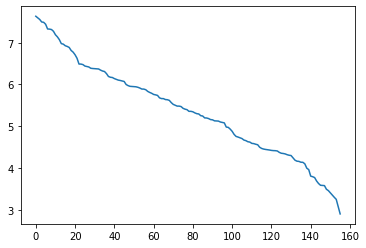

In [95]:
plt.plot(copy18.Happiness, label="2018")